In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load the dataset
print(" Dataset Information")
print("-" * 50)
df = pd.read_csv('data.csv')
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())

 Dataset Information
--------------------------------------------------
Dataset Shape: (4424, 1)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Attribute and Characteristics


Dataset Information
--------------------------------------------------
Number of rows: 4424
Number of columns: 37

Column Names:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd se

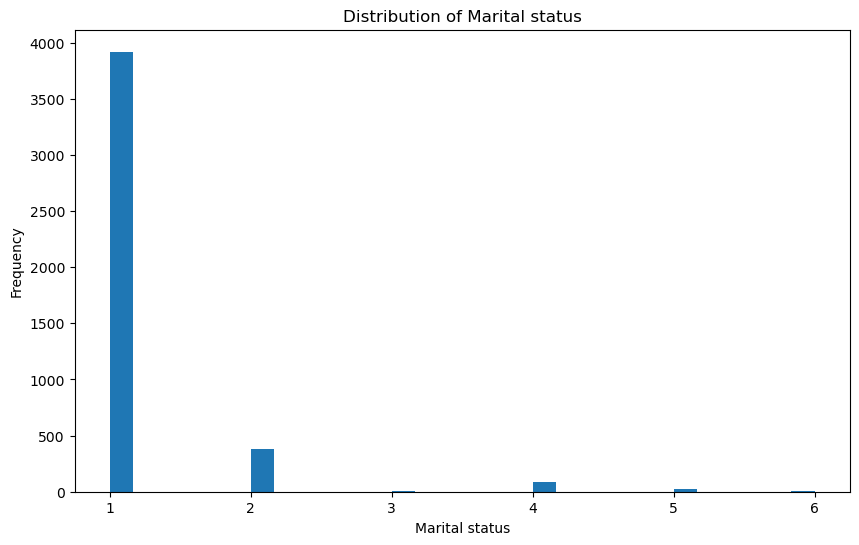

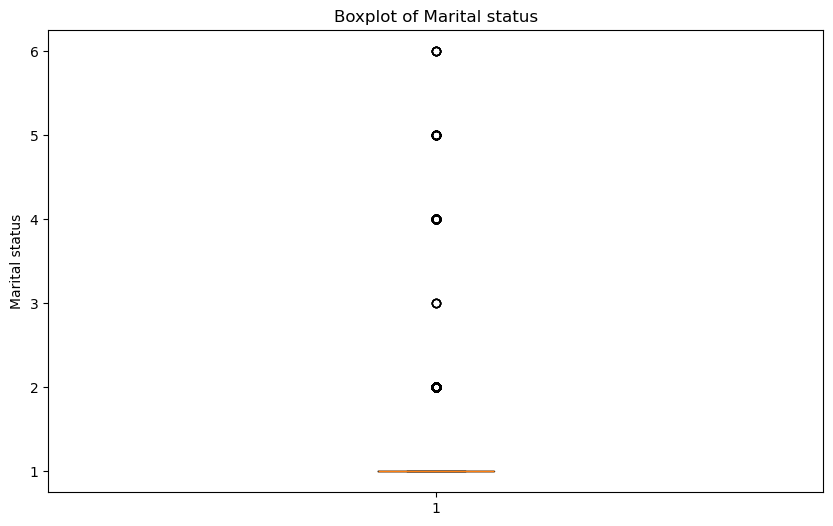

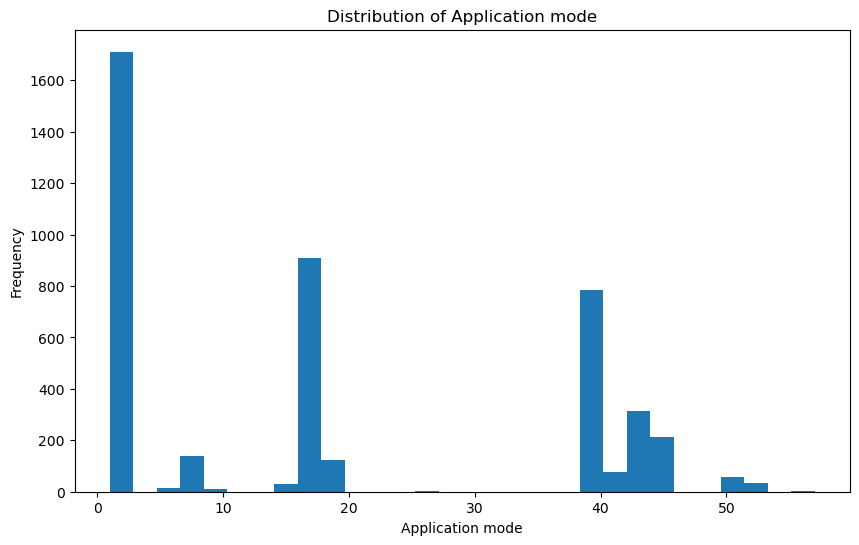

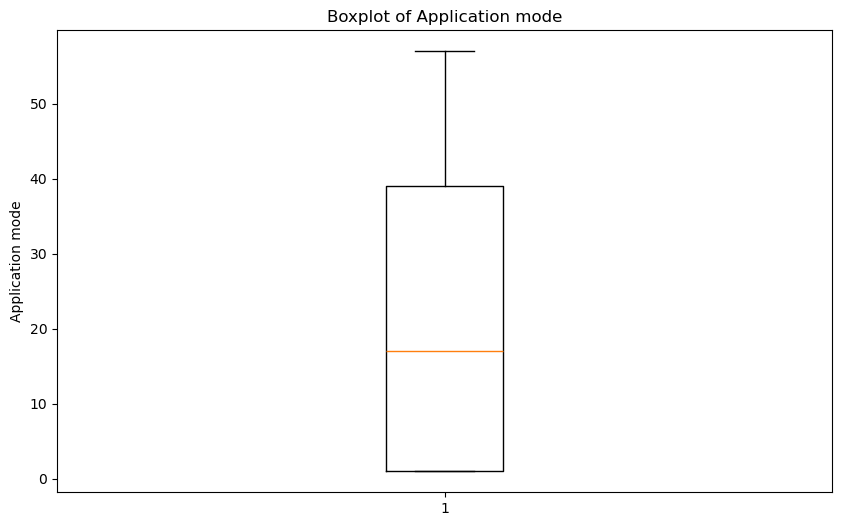

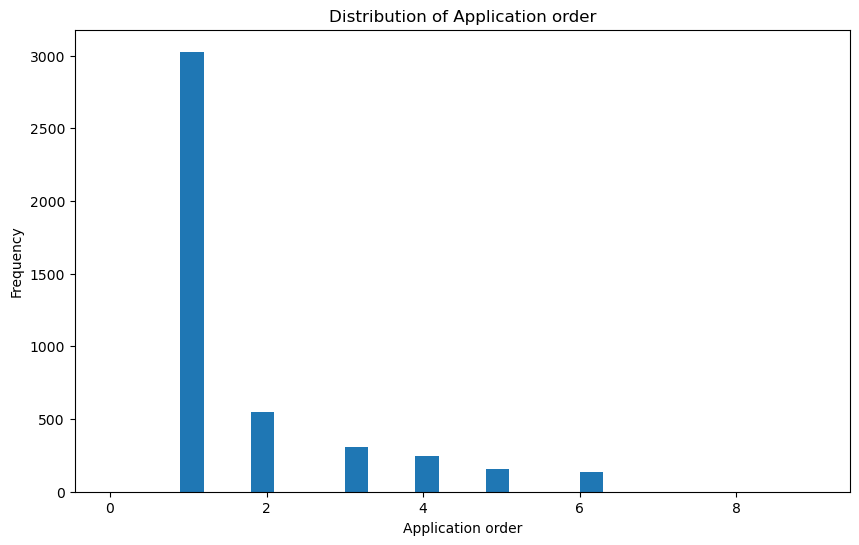

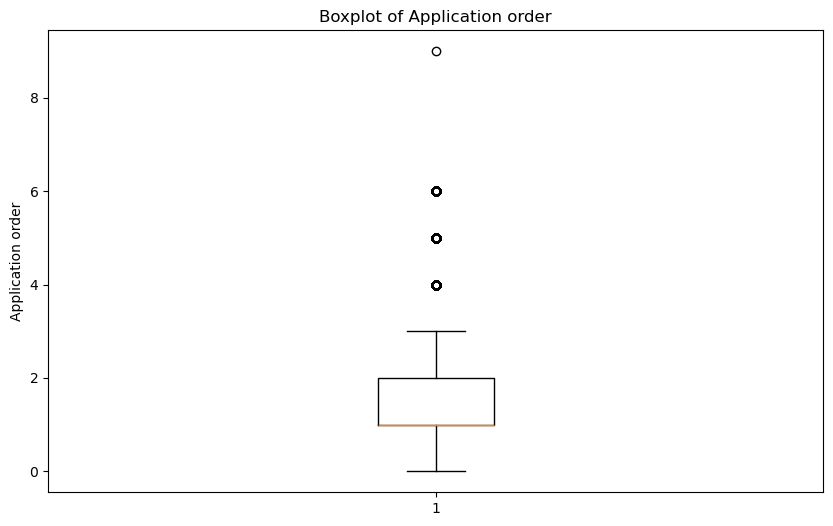

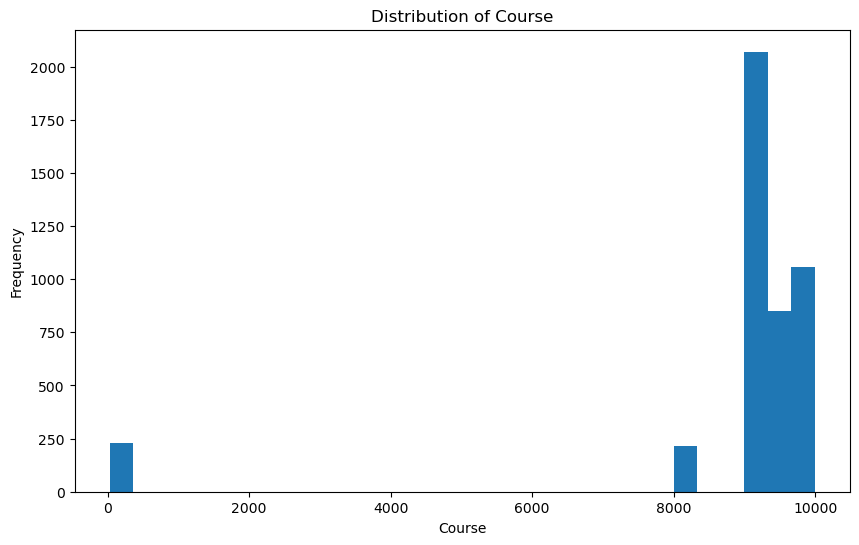

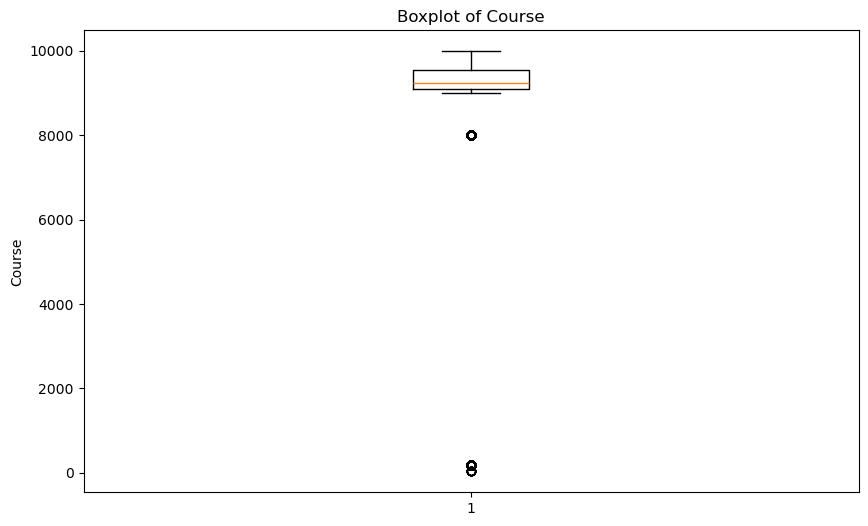

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


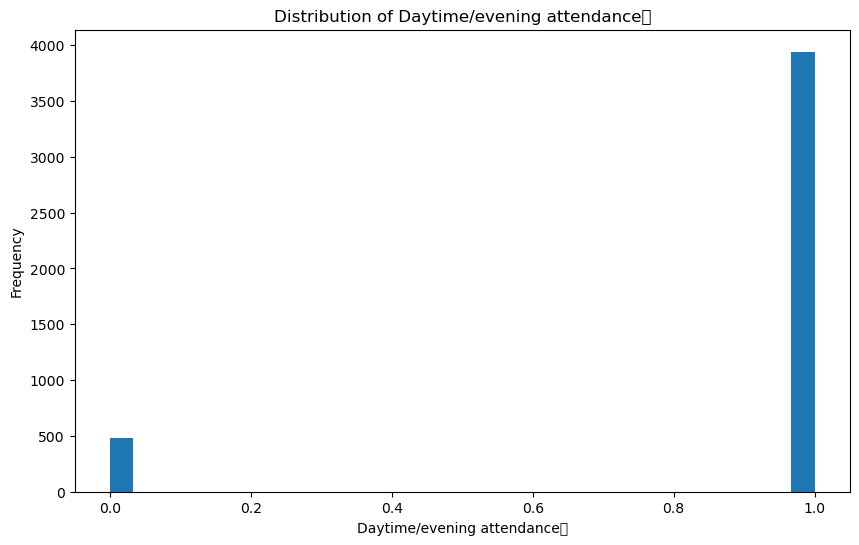

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


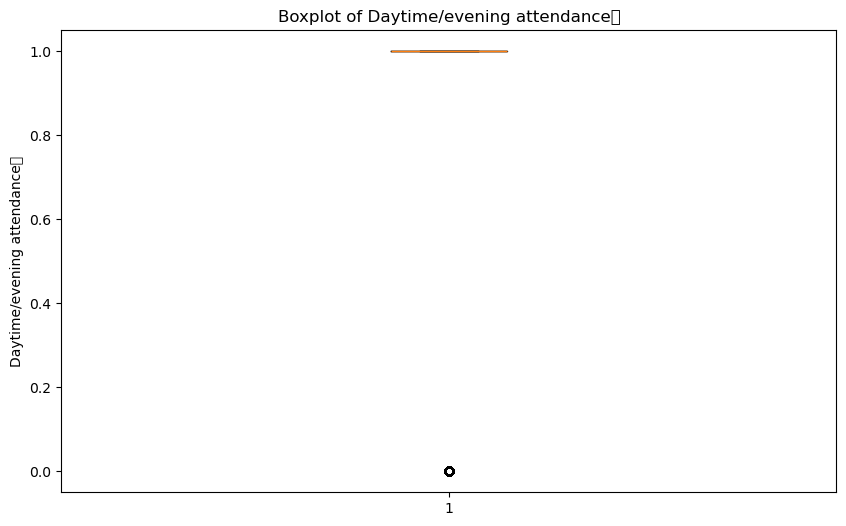

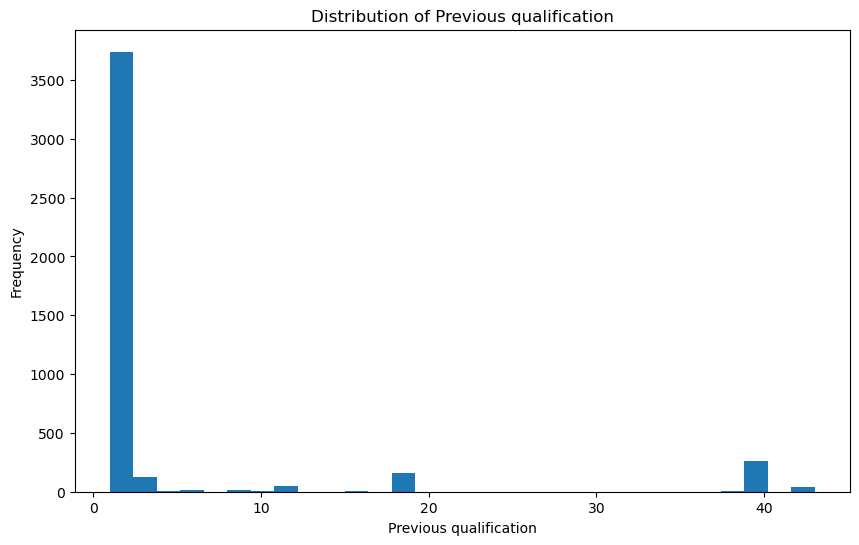

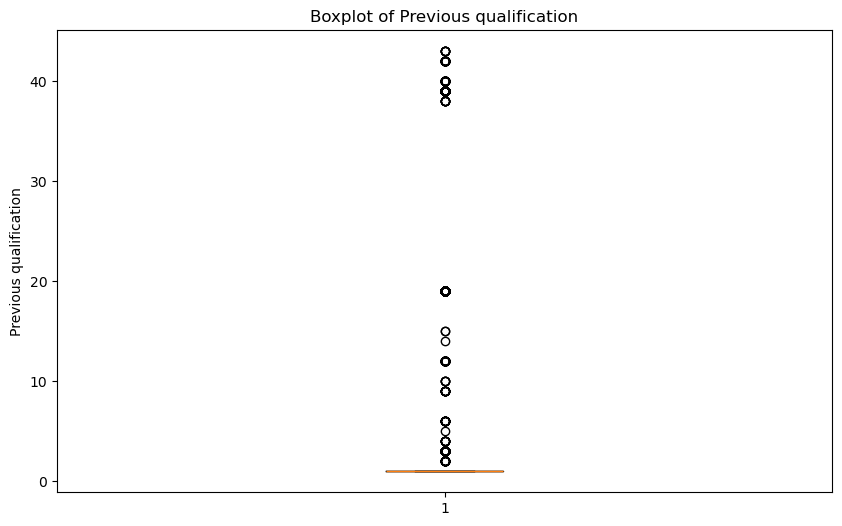

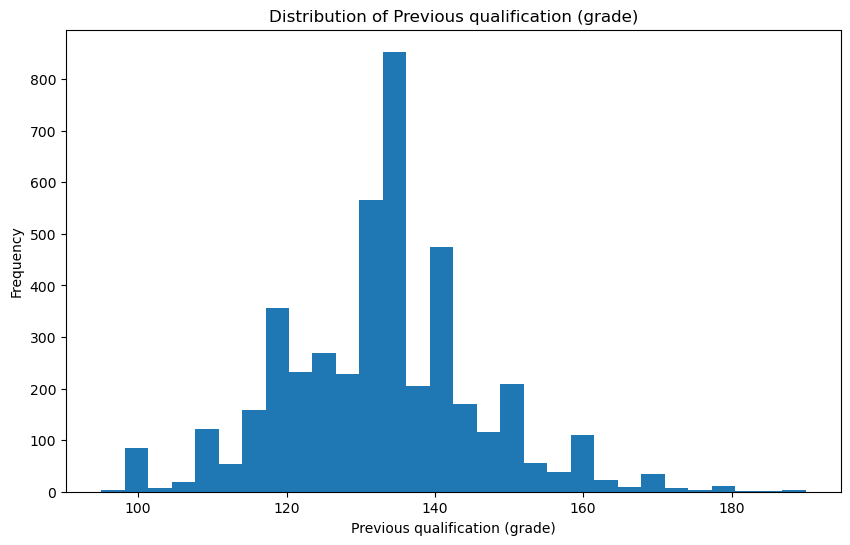

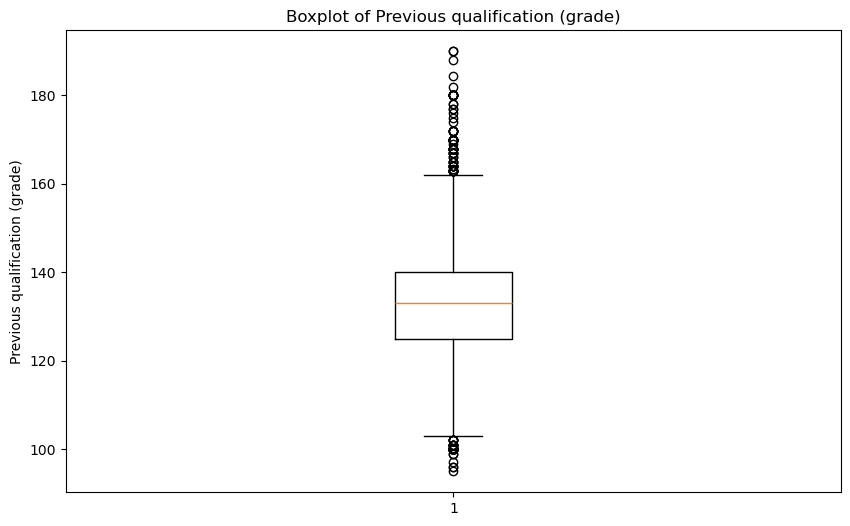

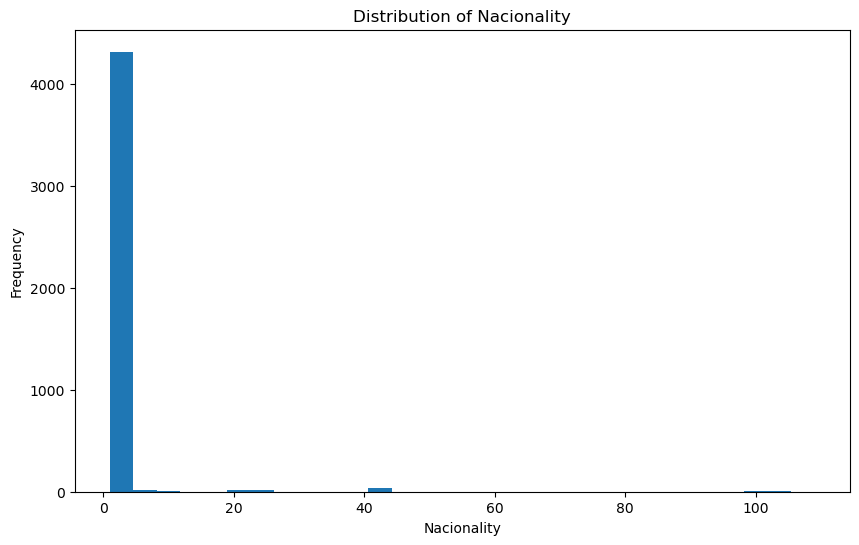

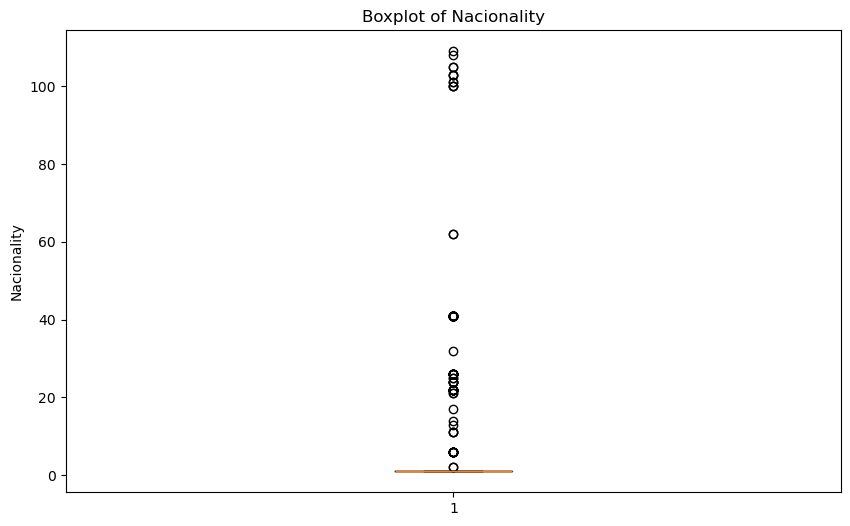

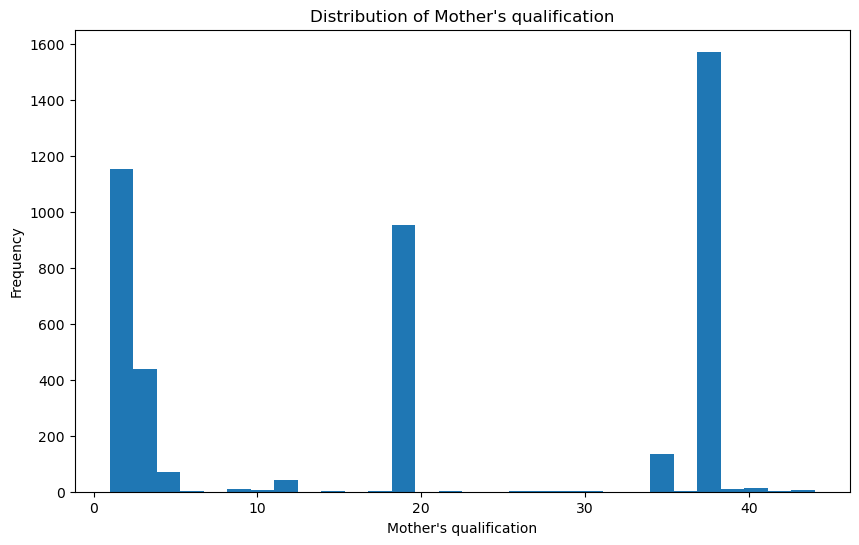

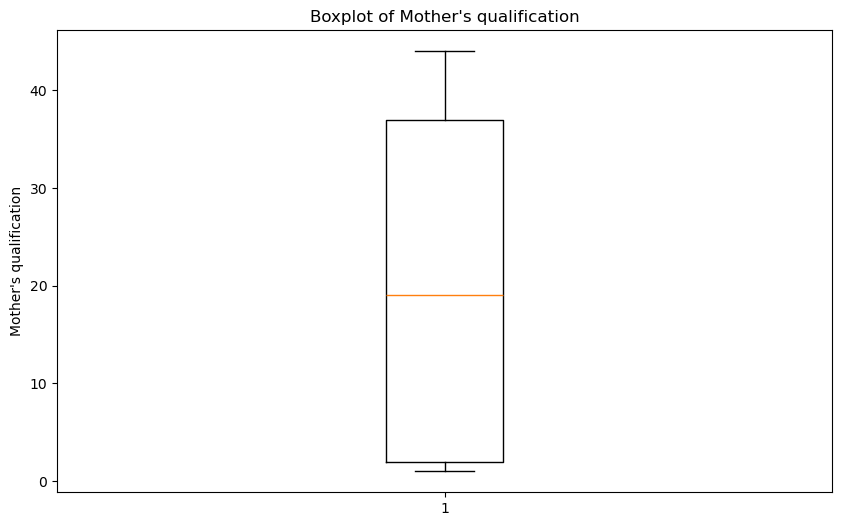

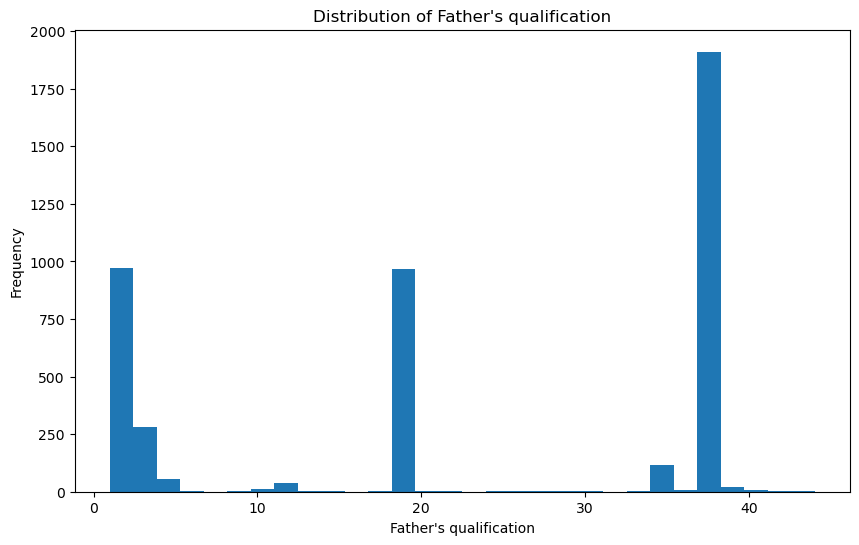

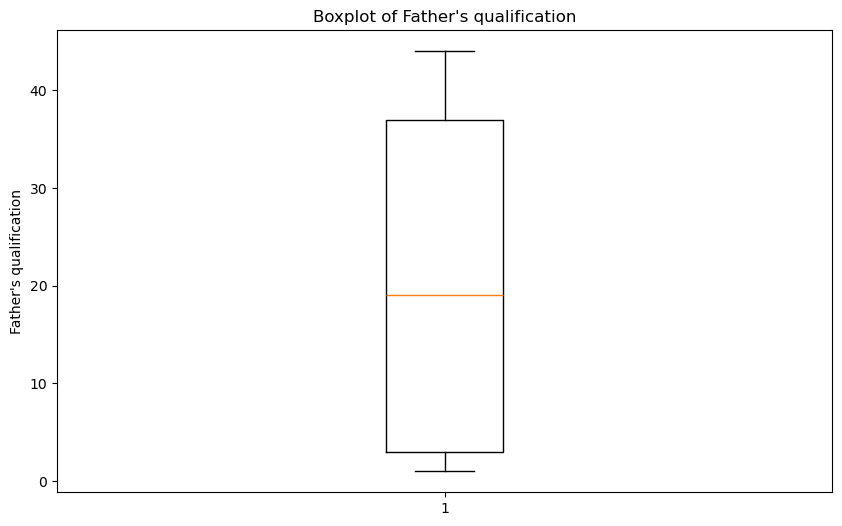

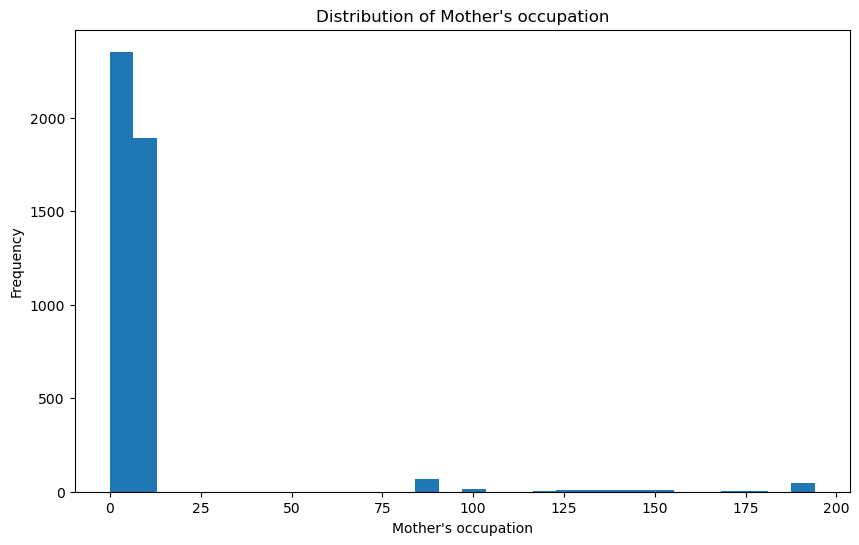

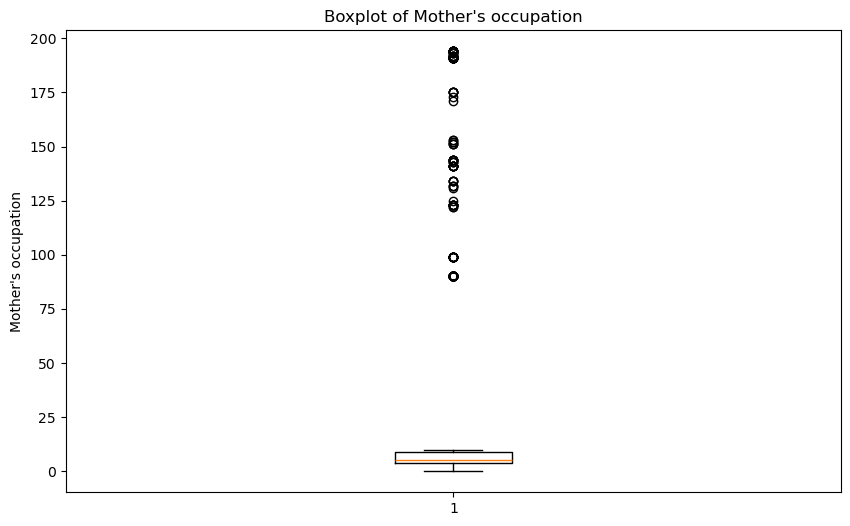

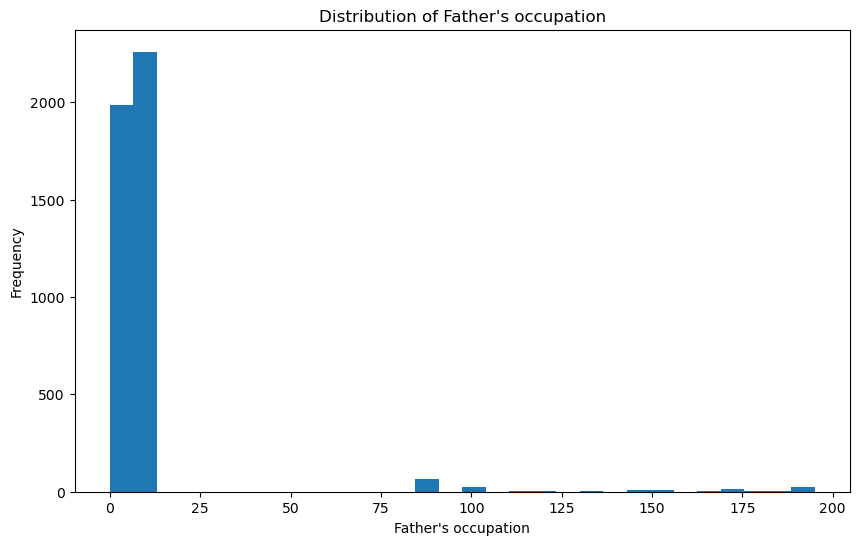

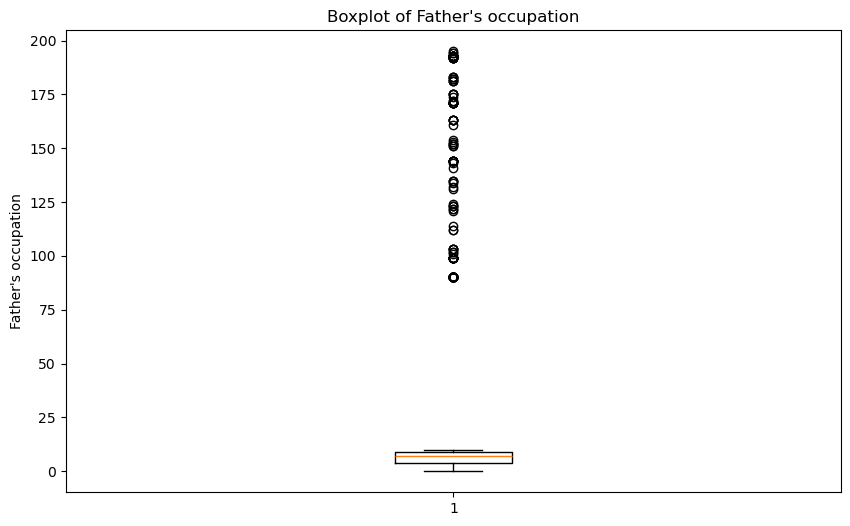

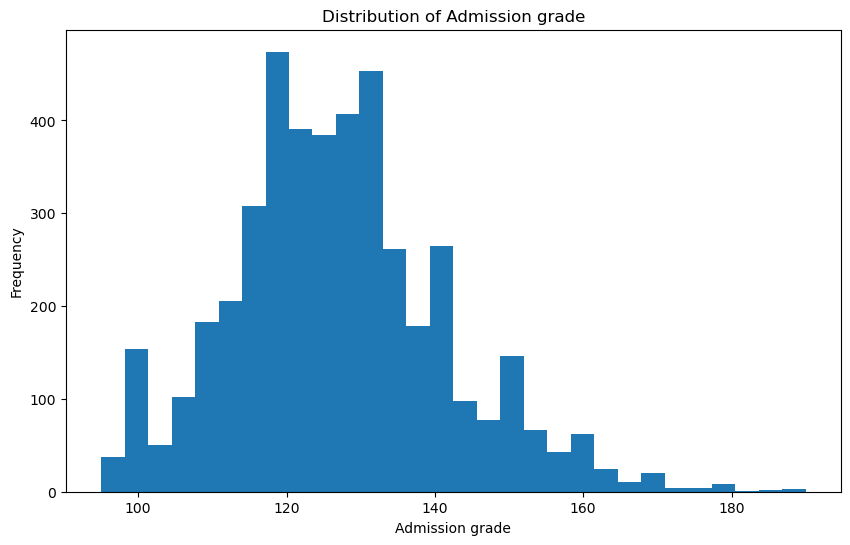

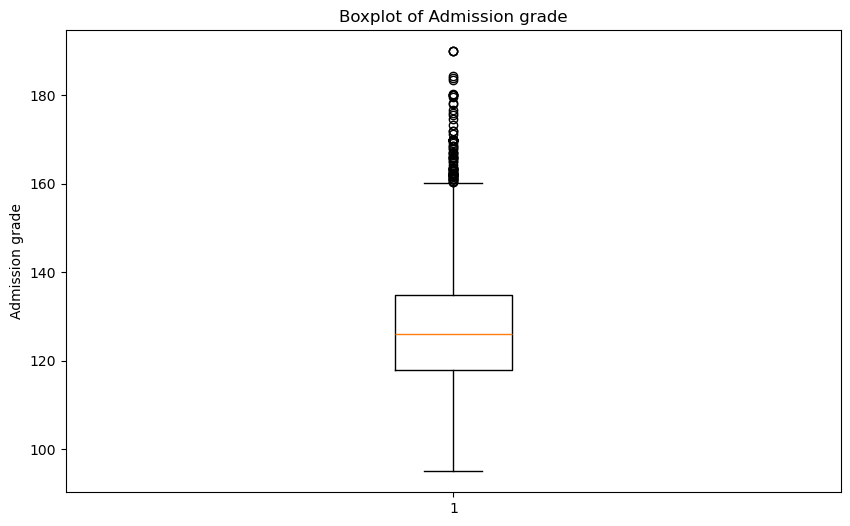

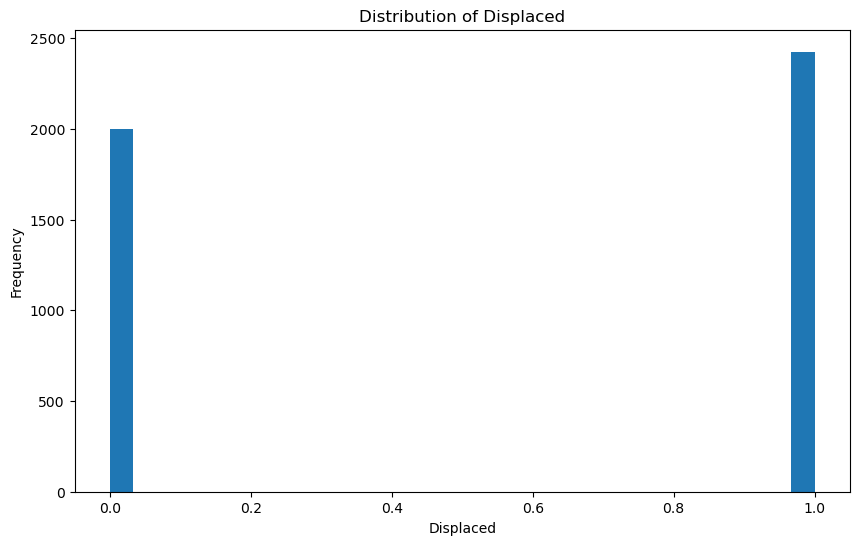

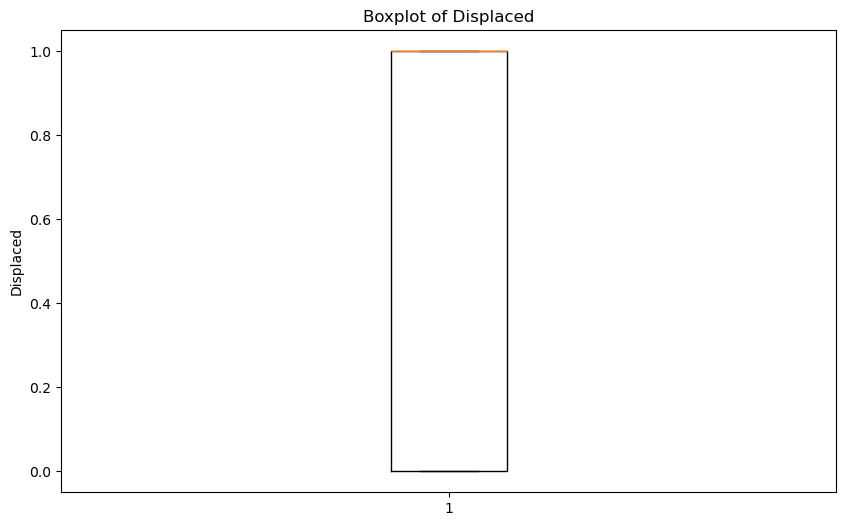

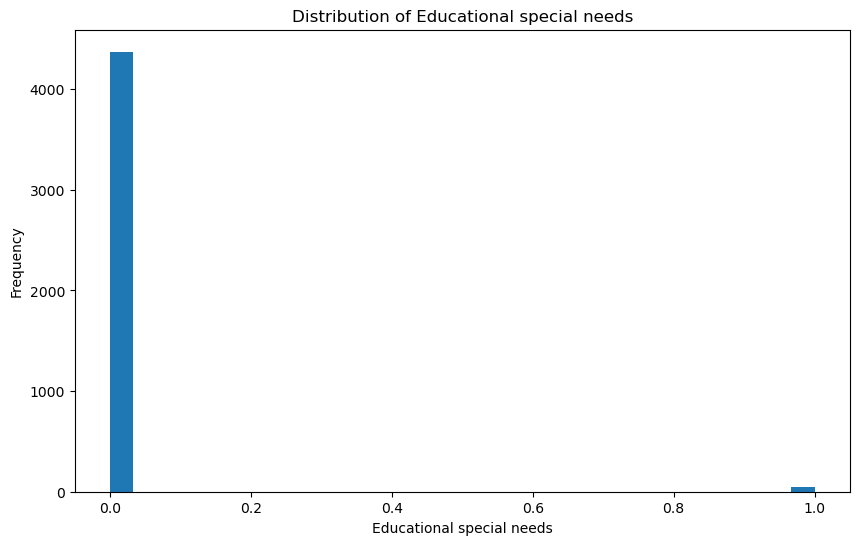

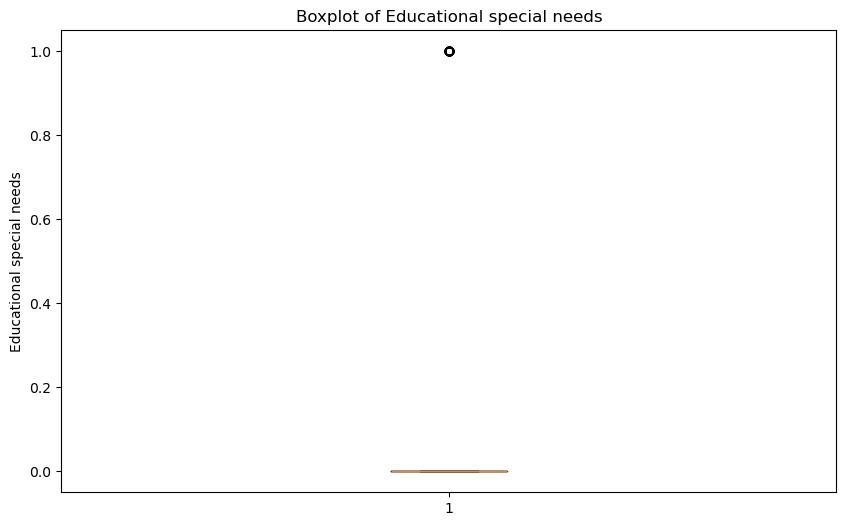

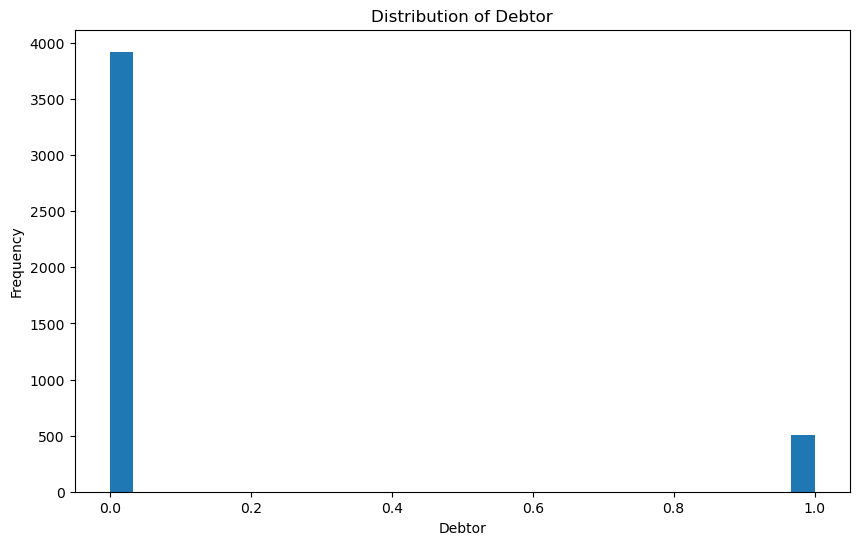

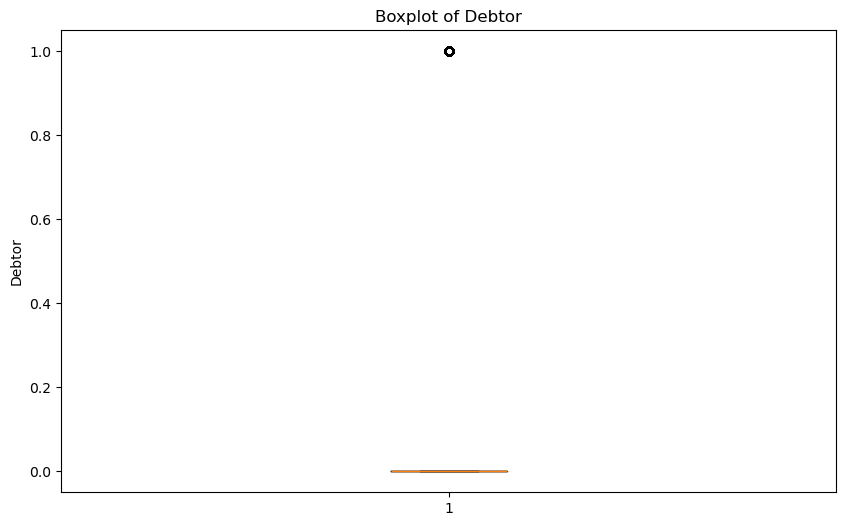

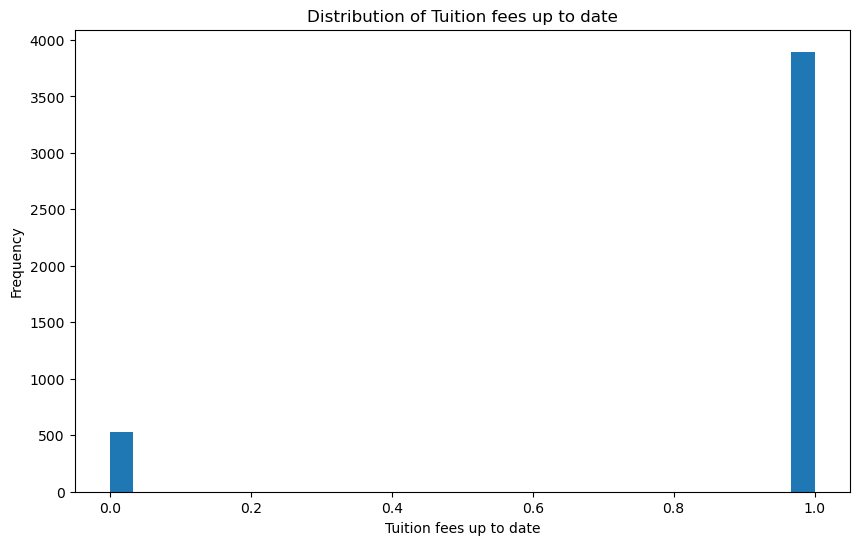

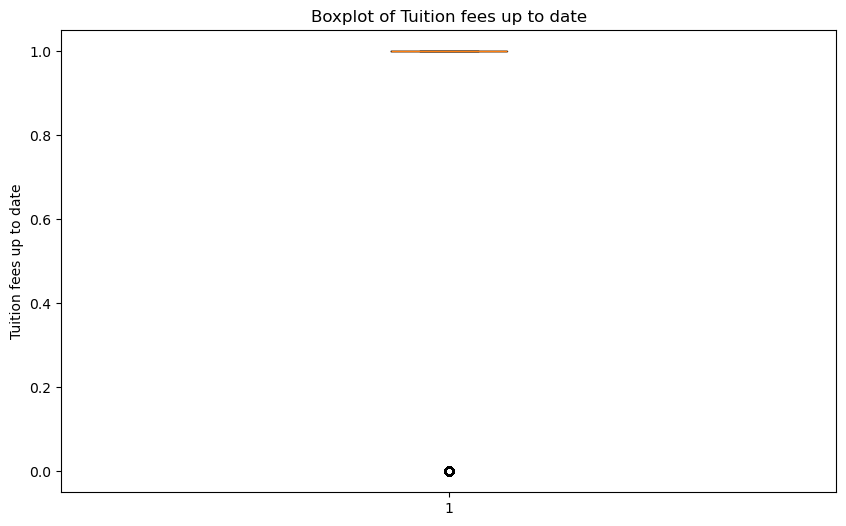

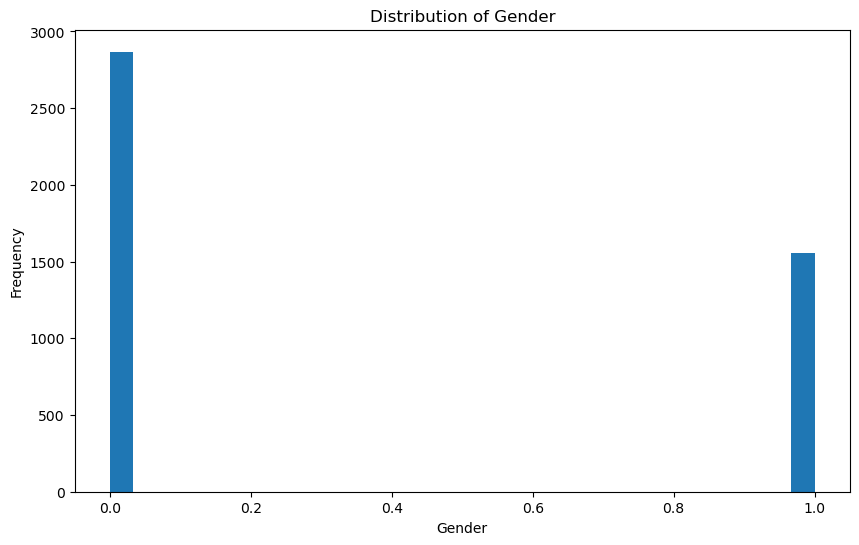

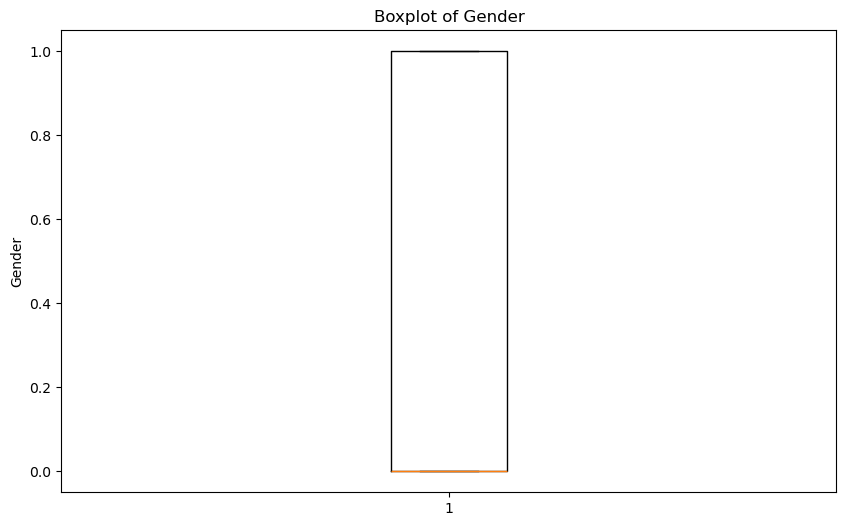

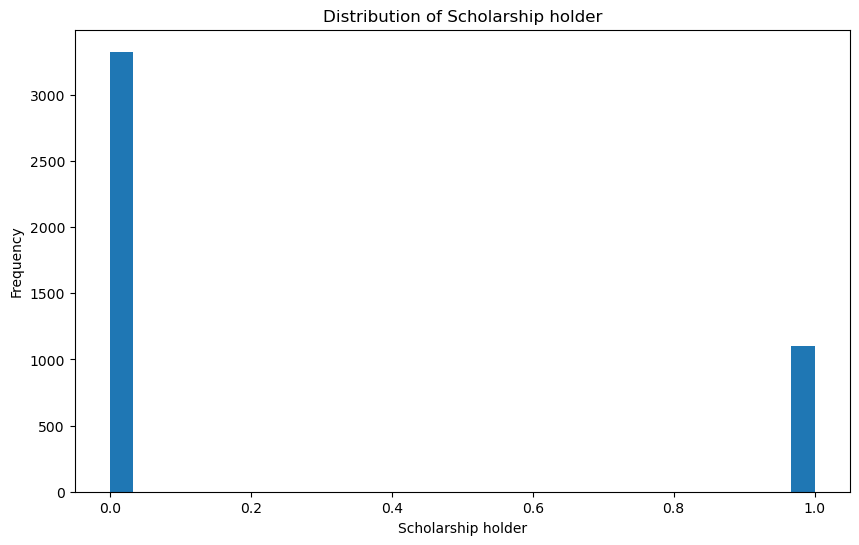

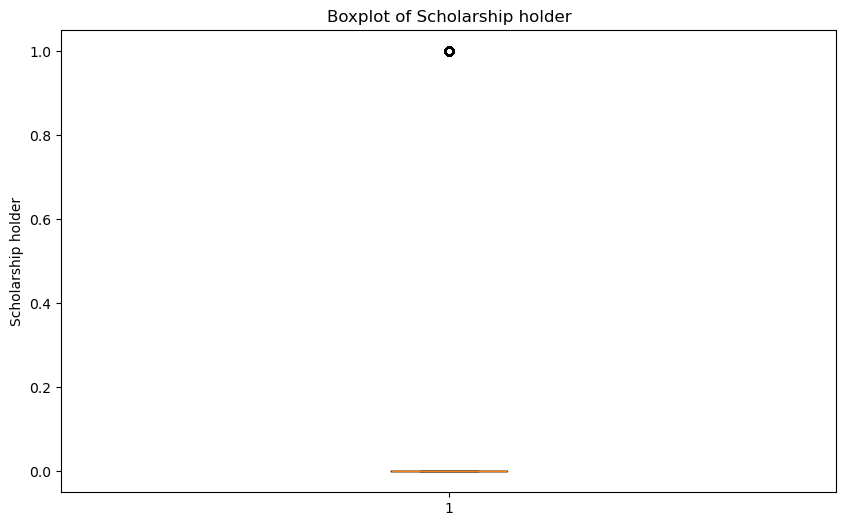

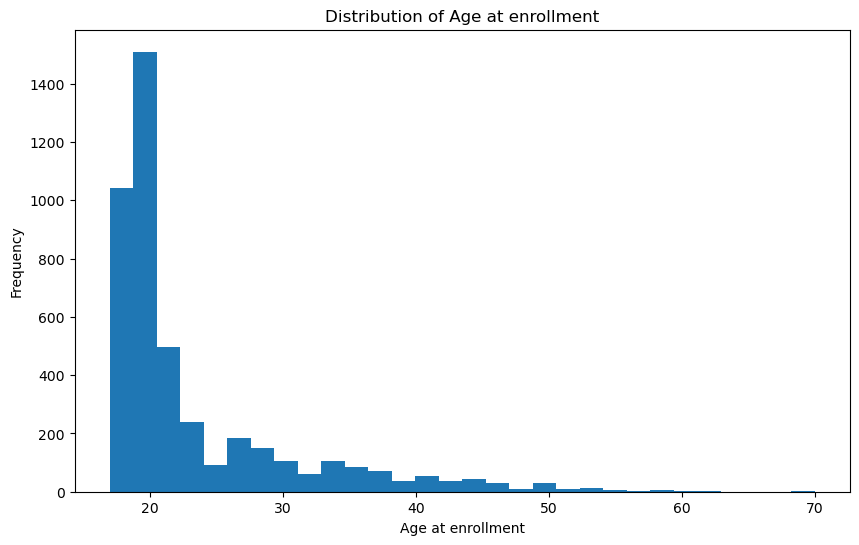

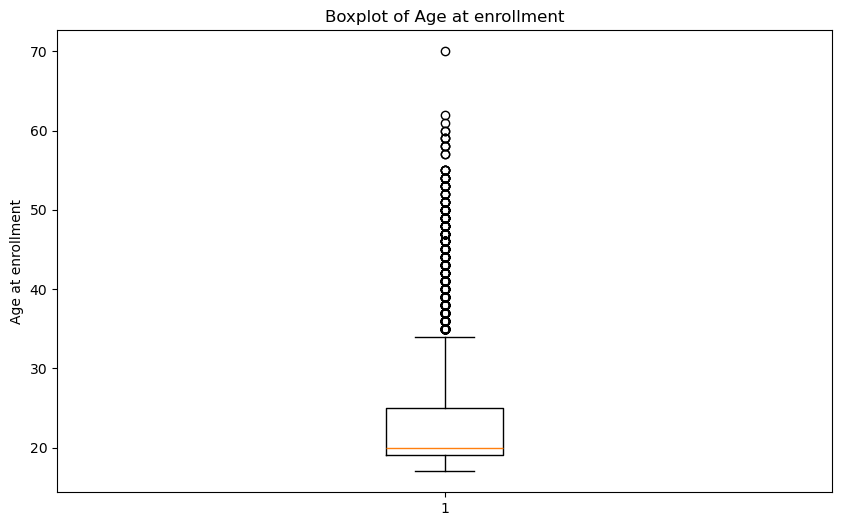

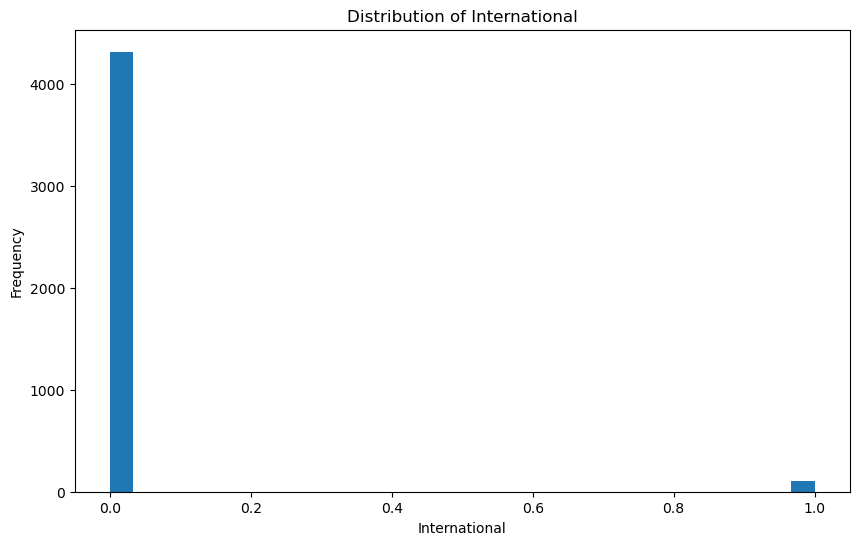

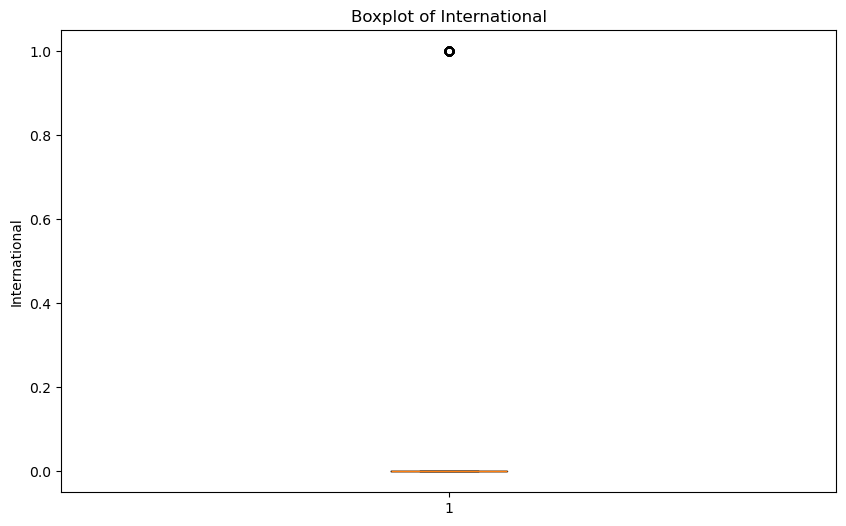

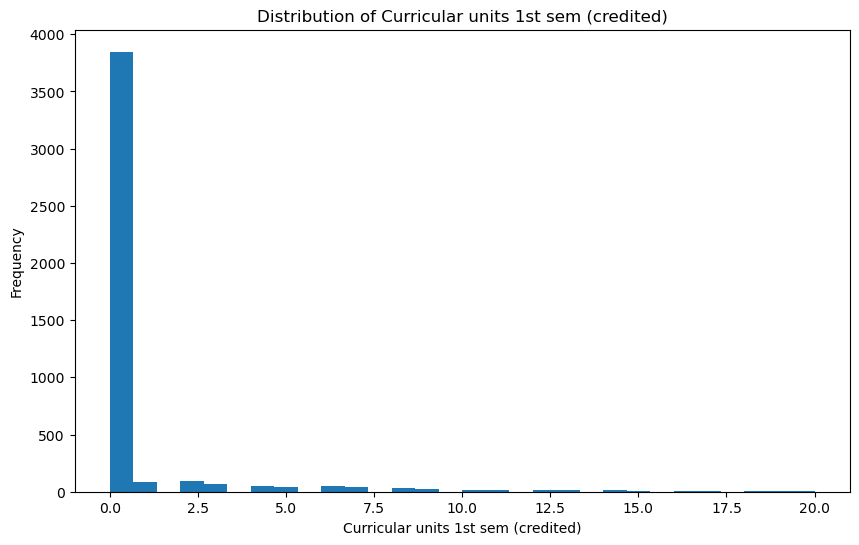

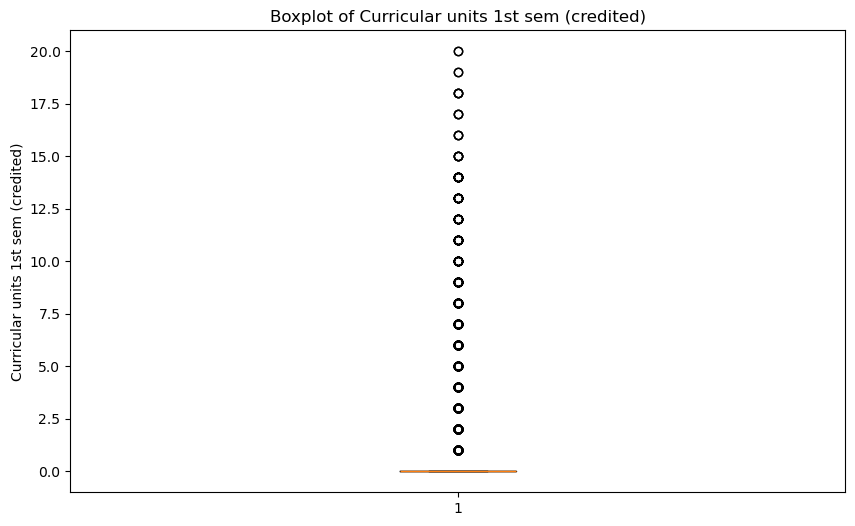

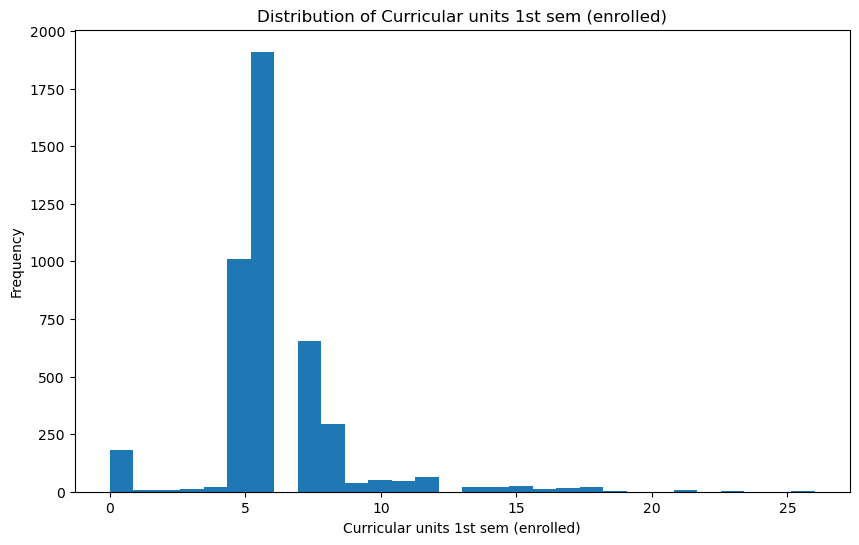

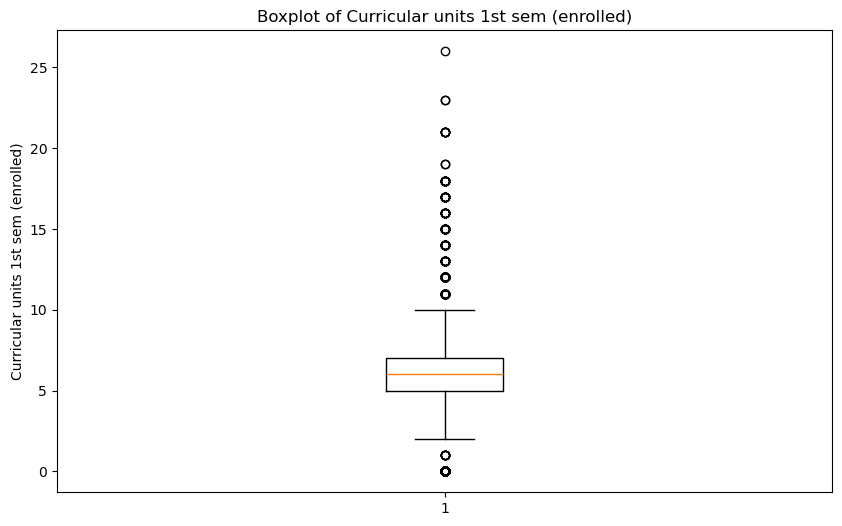

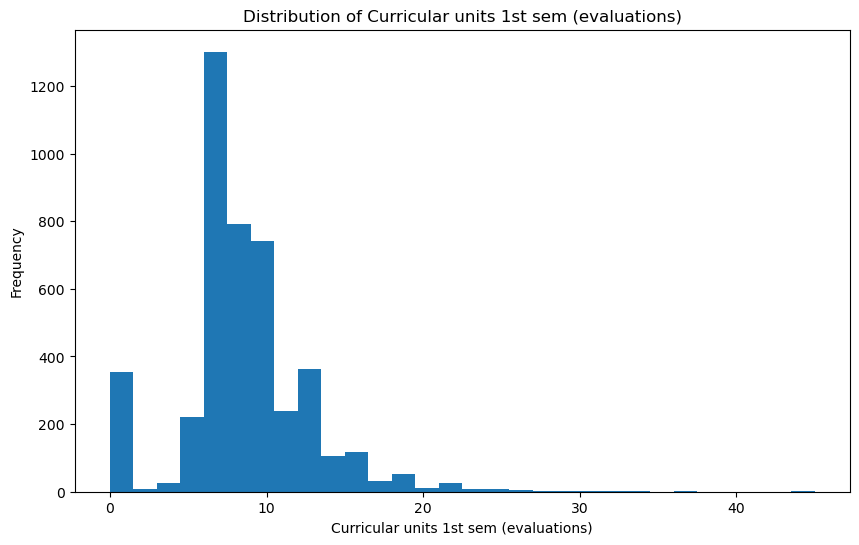

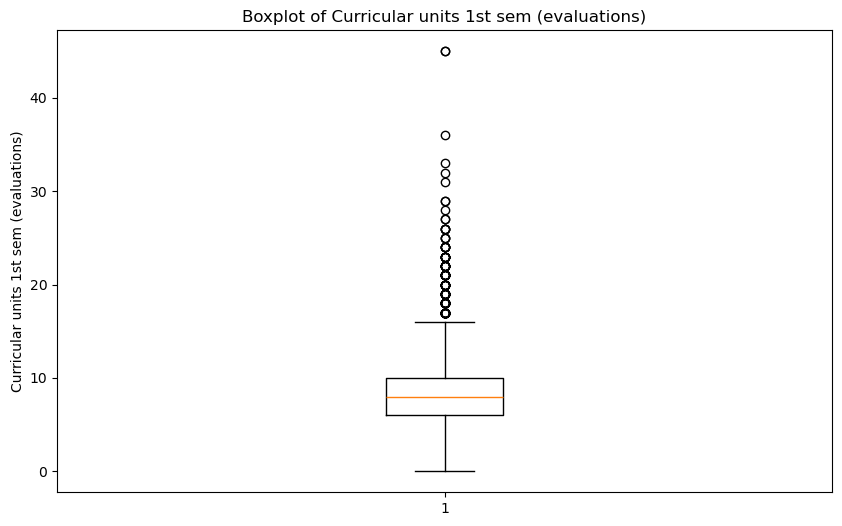

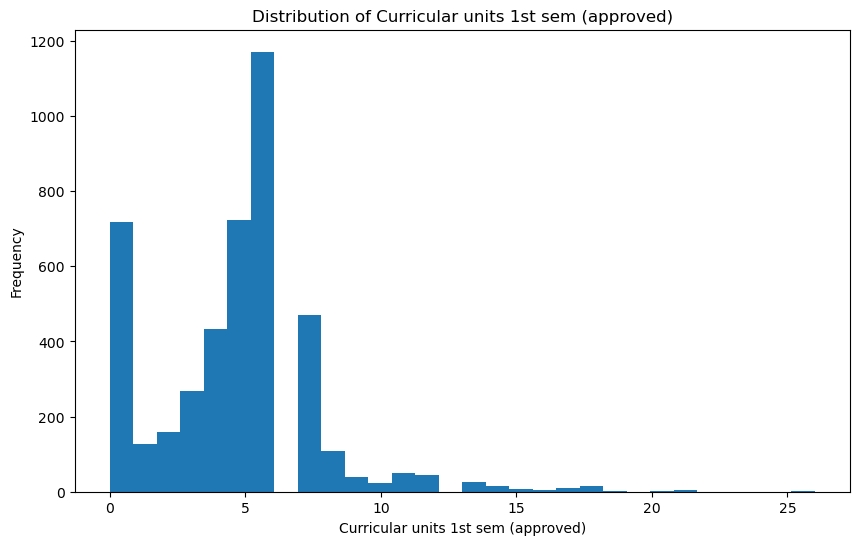

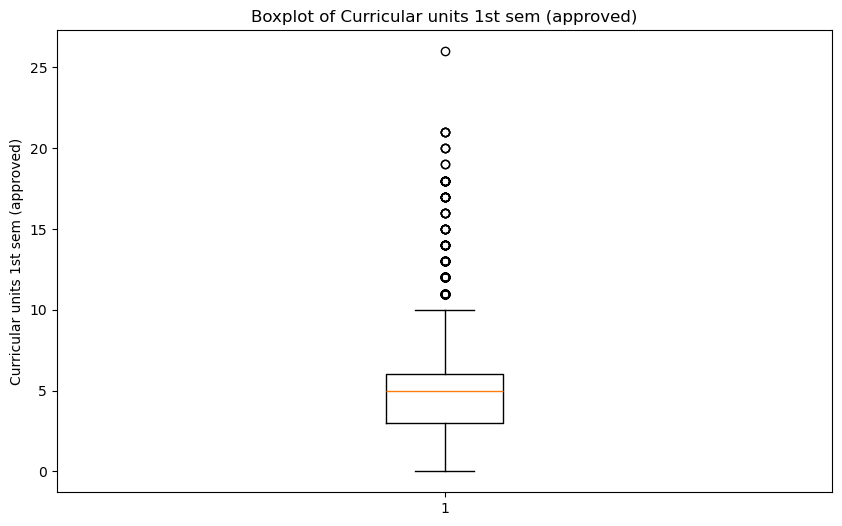

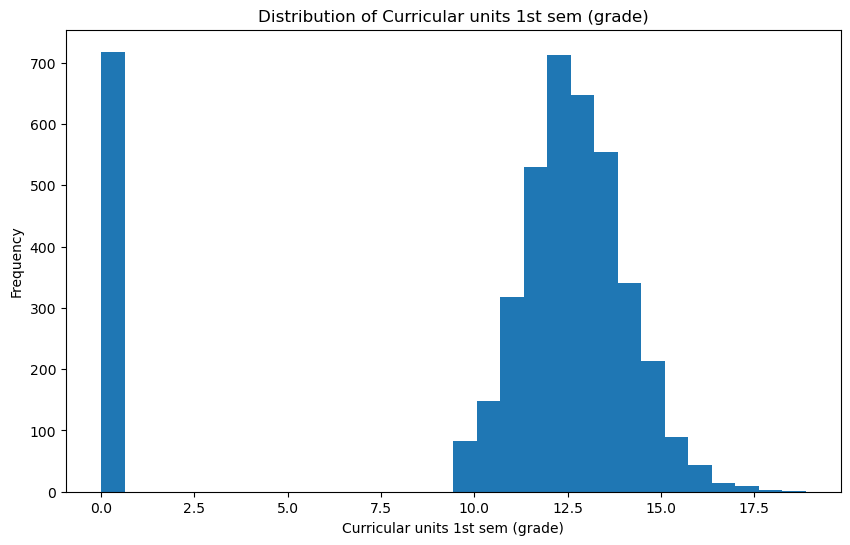

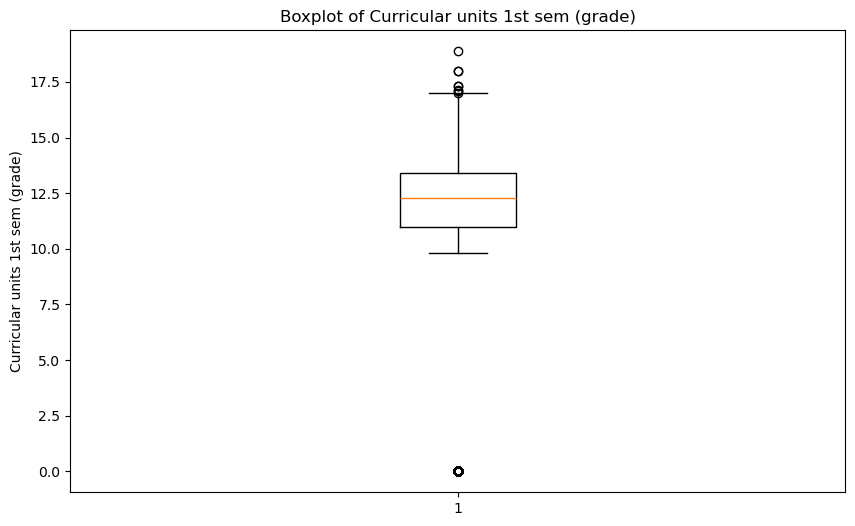

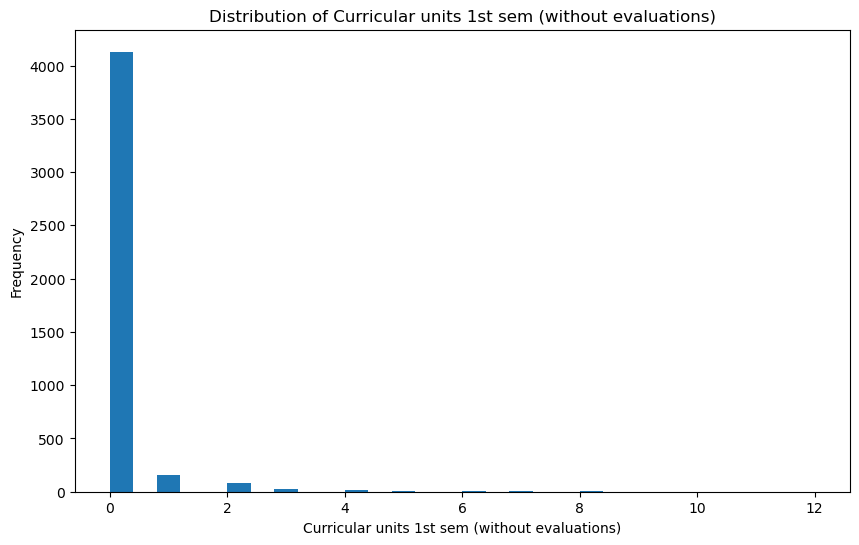

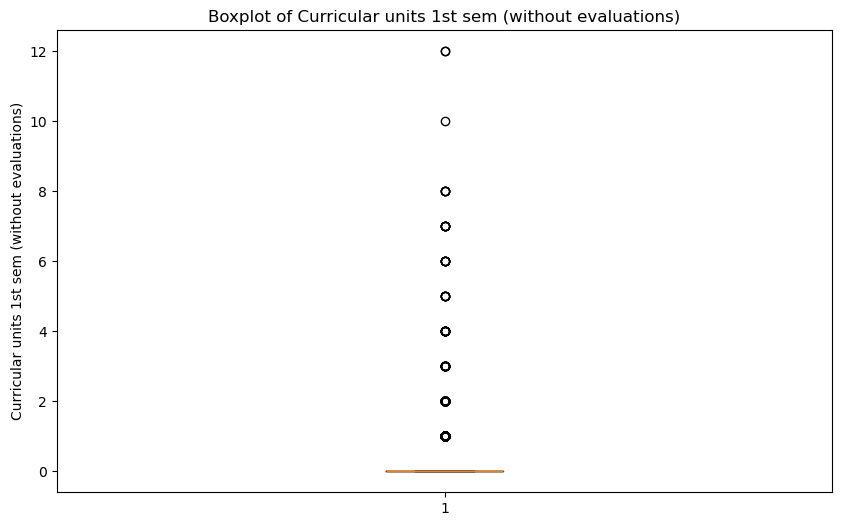

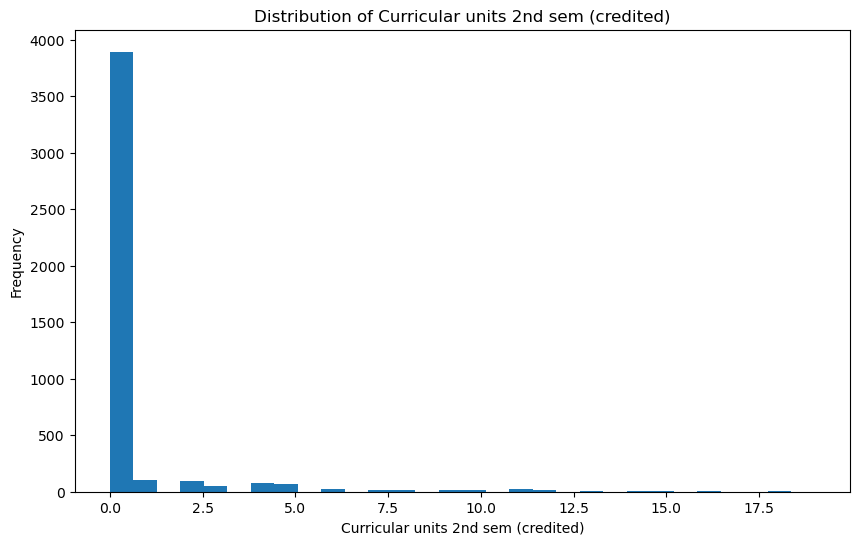

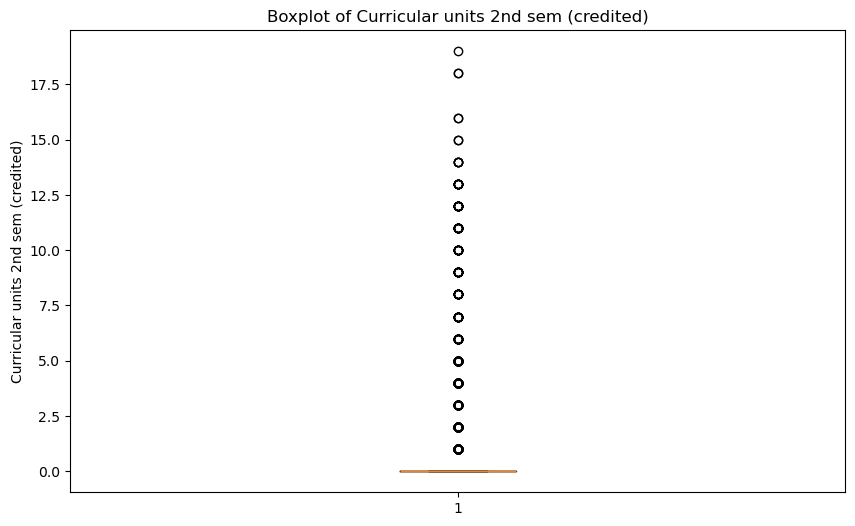

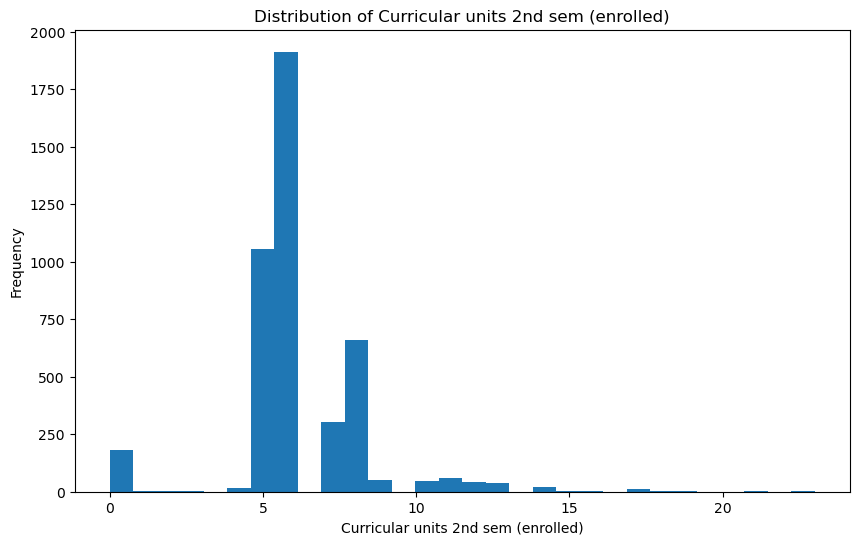

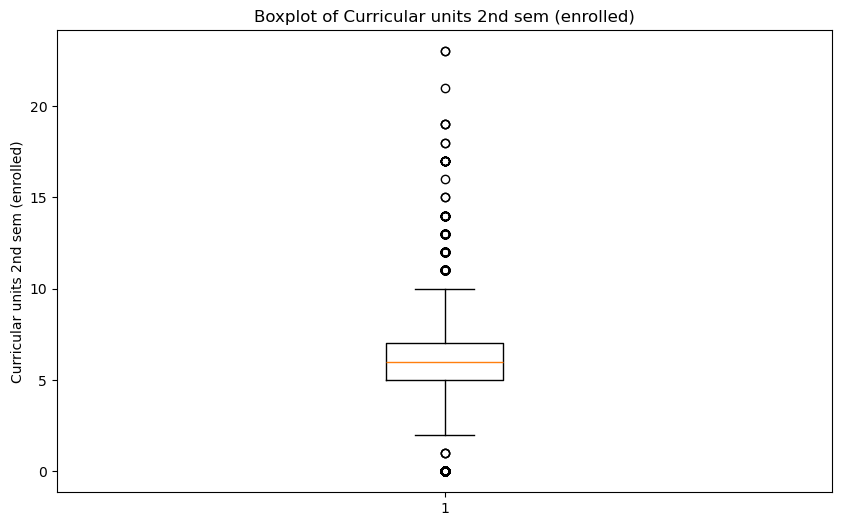

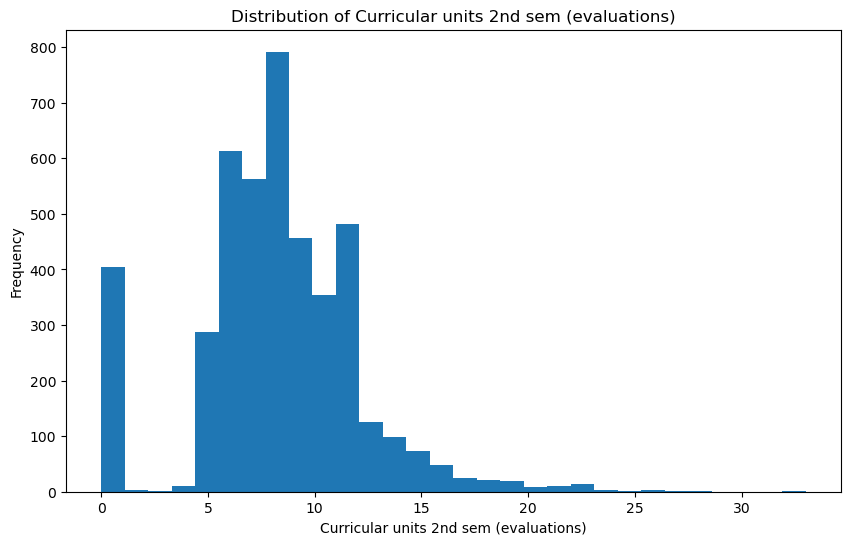

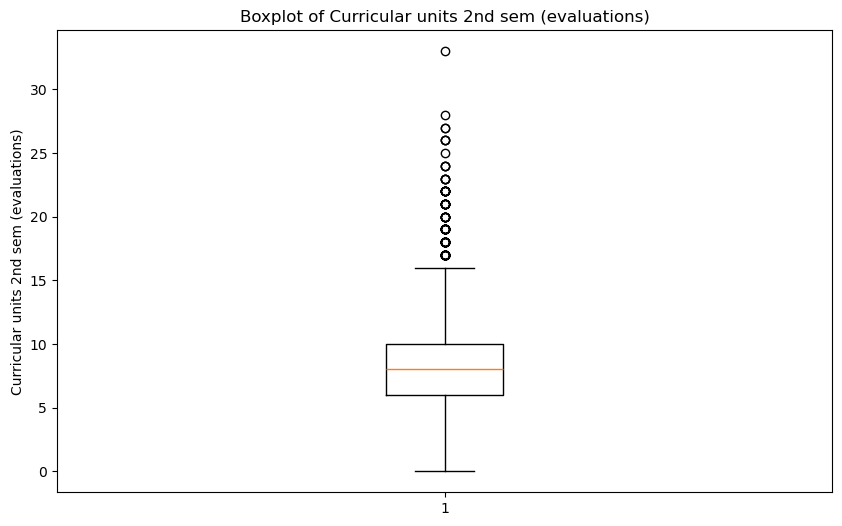

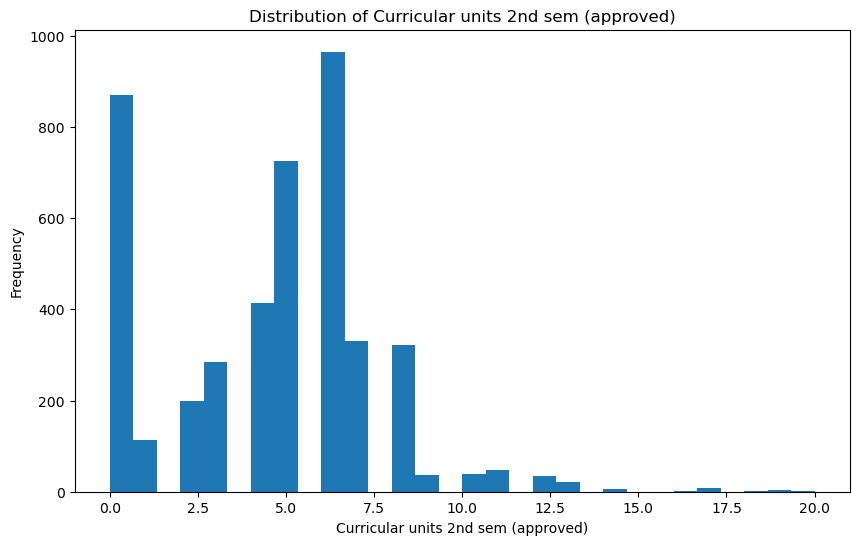

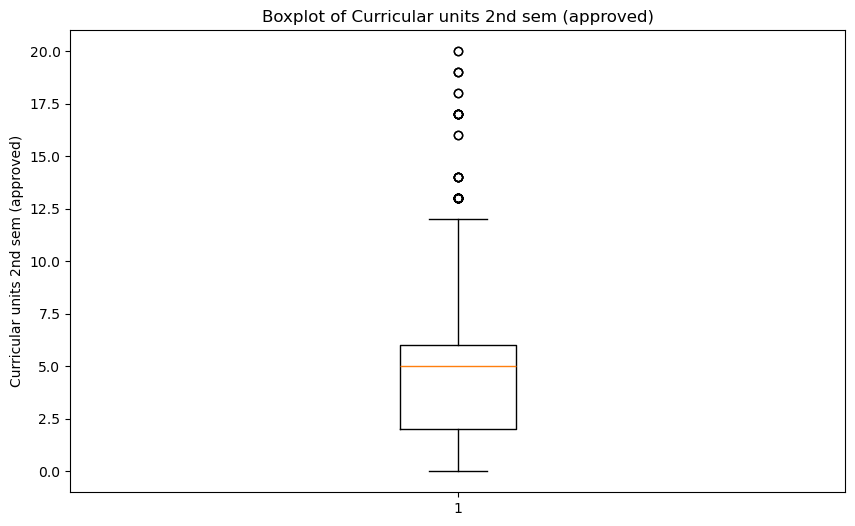

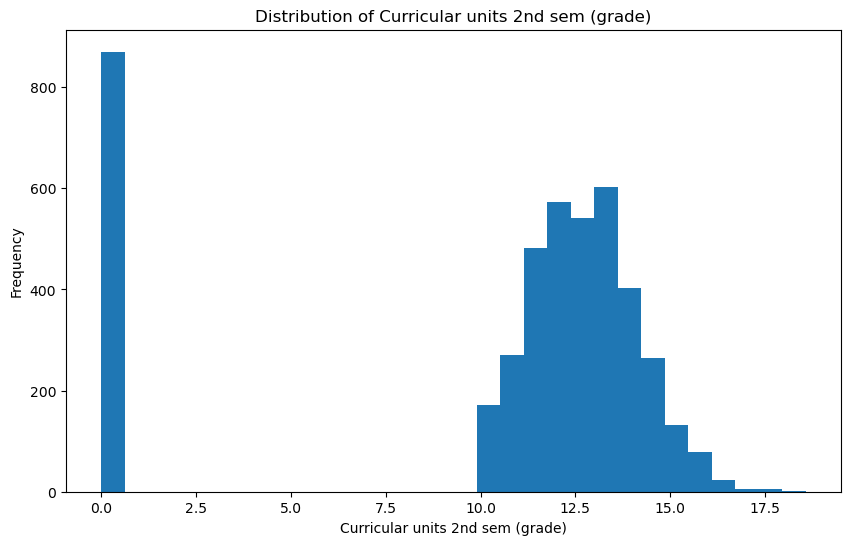

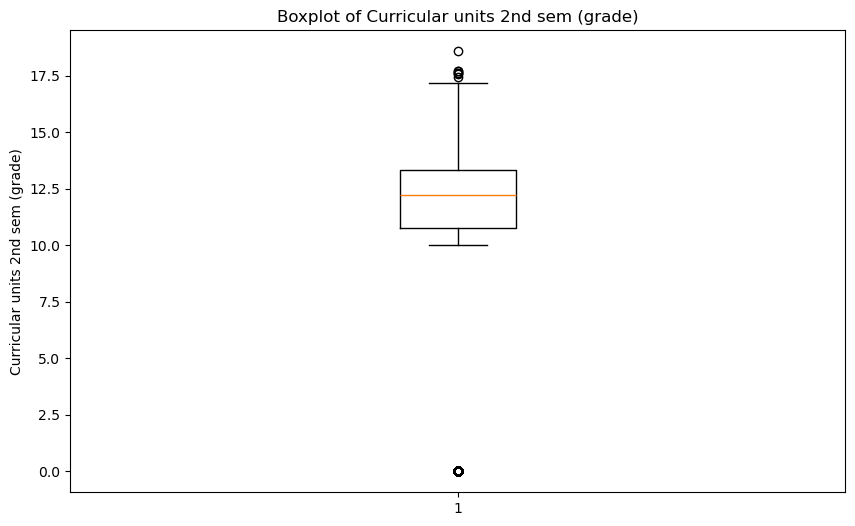

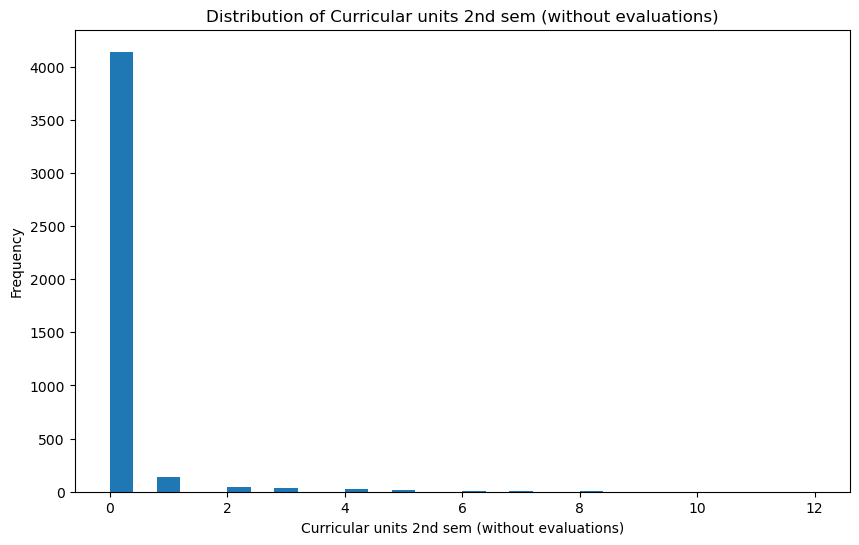

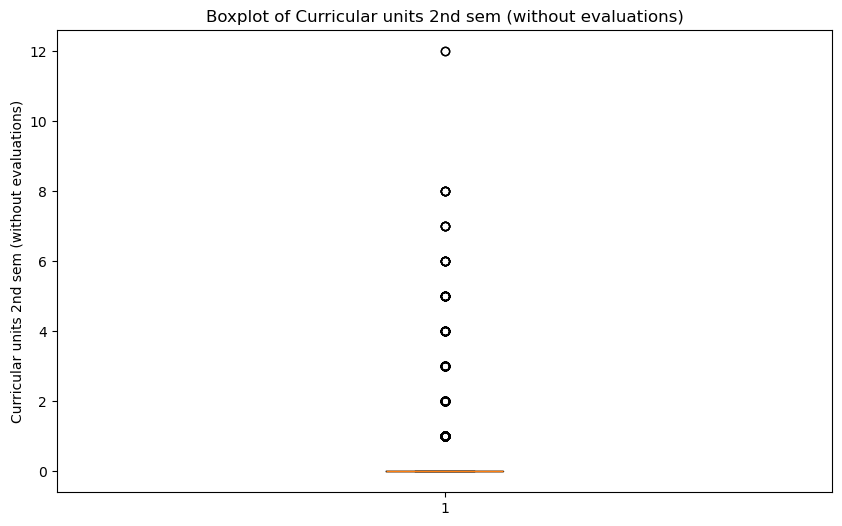

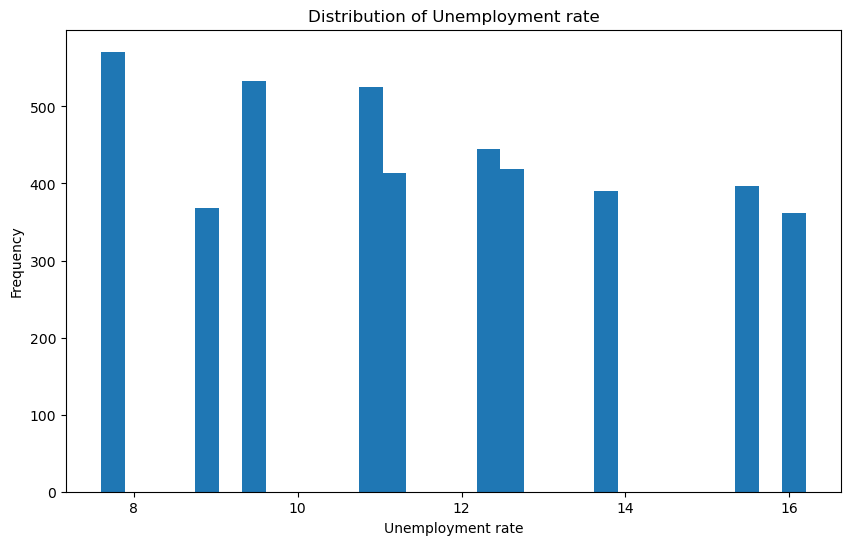

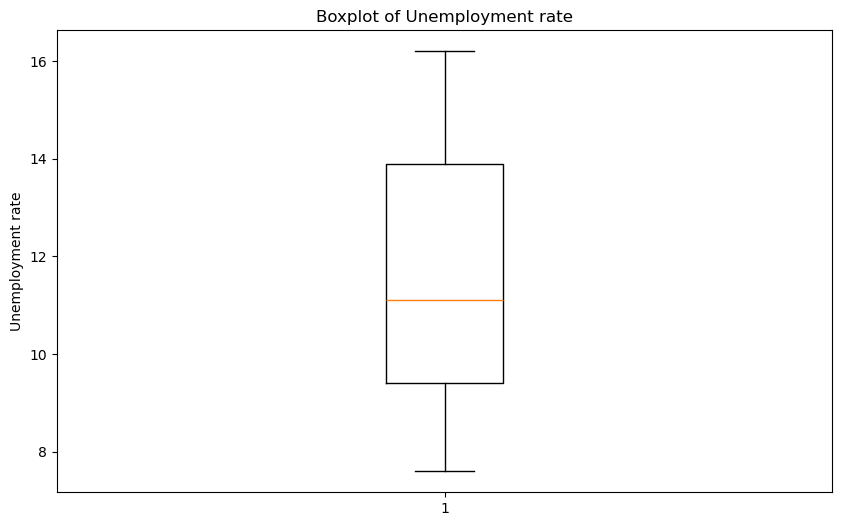

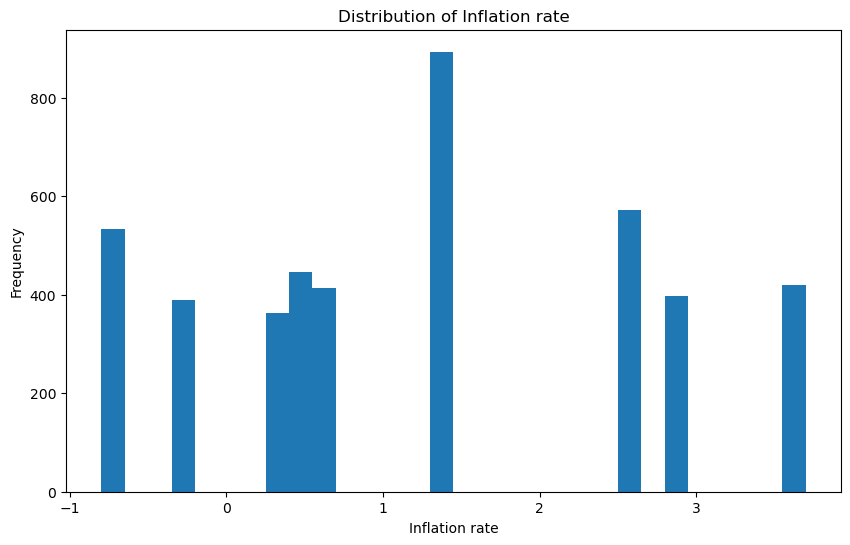

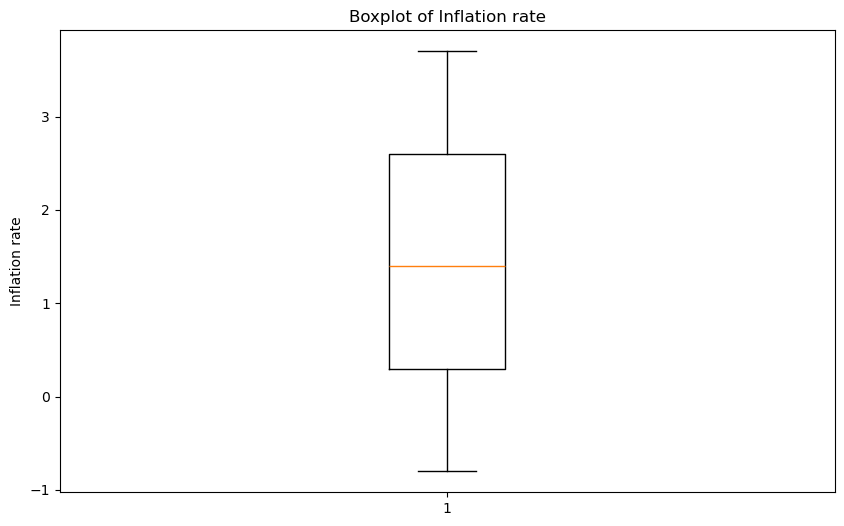

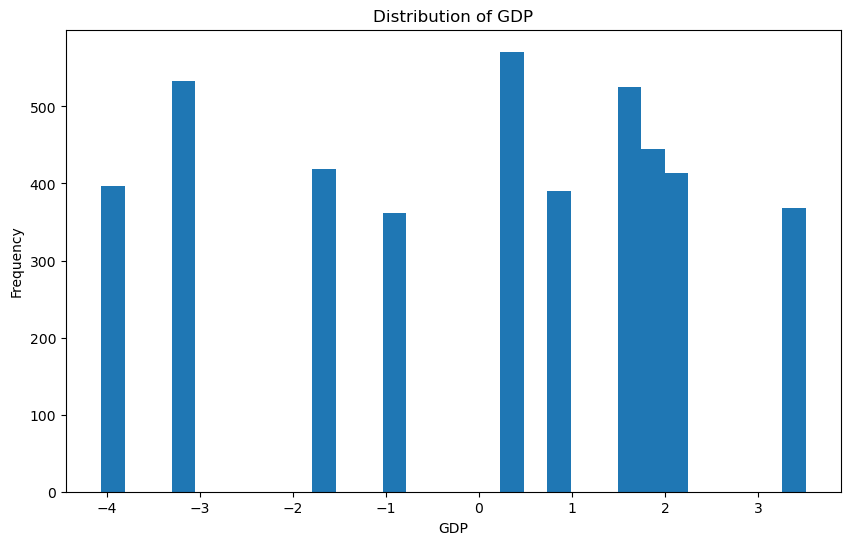

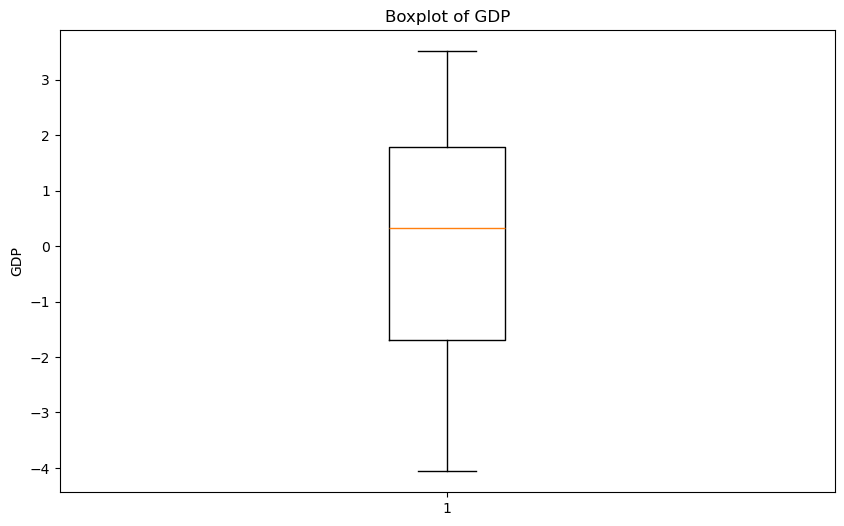

In [6]:
# First, let's properly parse the CSV with semicolon separator
df = pd.read_csv('data.csv', sep=';')

# Print basic information about the dataset
print("Dataset Information")
print("-" * 50)
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn Names:")
print(df.columns.tolist())

# Analyze each attribute
print("\nAttribute Analysis")
print("-" * 50)
for column in df.columns:
    print(f"\nAttribute: {column}")
    print(f"Data Type: {df[column].dtype}")
    
    # Calculate missing values
    missing_percent = (df[column].isnull().sum() / len(df)) * 100
    print(f"Missing Values: {missing_percent:.2f}%")
    
    # For numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
        print(f"Mean: {df[column].mean():.2f}")
        print(f"Median: {df[column].median():.2f}")
        print(f"Standard Deviation: {df[column].std():.2f}")
        
        # Check for outliers using IQR method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"Number of outliers: {len(outliers)}")
        print(f"Outlier percentage: {(len(outliers)/len(df))*100:.2f}%")
    
    # For categorical columns
    else:
        unique_values = df[column].nunique()
        print(f"Number of unique values: {unique_values}")
        if unique_values < 10:  # Only show value counts if not too many unique values
            print("\nValue Counts:")
            print(df[column].value_counts())
    
    print("-" * 30)

# Create visualizations for numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
    print("\nCreating visualizations for numeric columns...")
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        plt.hist(df[column].dropna(), bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        # Boxplot to visualize outliers
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()

In [2]:
# First, let's see the unique values in the Target column
print("Unique values in Target column:")
print(df['Target'].unique())

# Remove 'Enrolled' records
print("\nRemoving 'Enrolled' records...")
original_size = len(df)
df = df[df['Target'] != 'Enrolled']
removed_count = original_size - len(df)
print(f"Removed {removed_count} 'Enrolled' records")
print(f"New dataset size: {len(df)}")

# Map categorical values to numerical values
# Now we only have 'Dropout' and 'Graduate'
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# You can now use 'Target_numerical' for your analysis

Unique values in Target column:
['Dropout' 'Graduate' 'Enrolled']

Removing 'Enrolled' records...
Removed 794 'Enrolled' records
New dataset size: 3630

Value counts after mapping:
Target_numerical
1    2209
0    1421
Name: count, dtype: int64


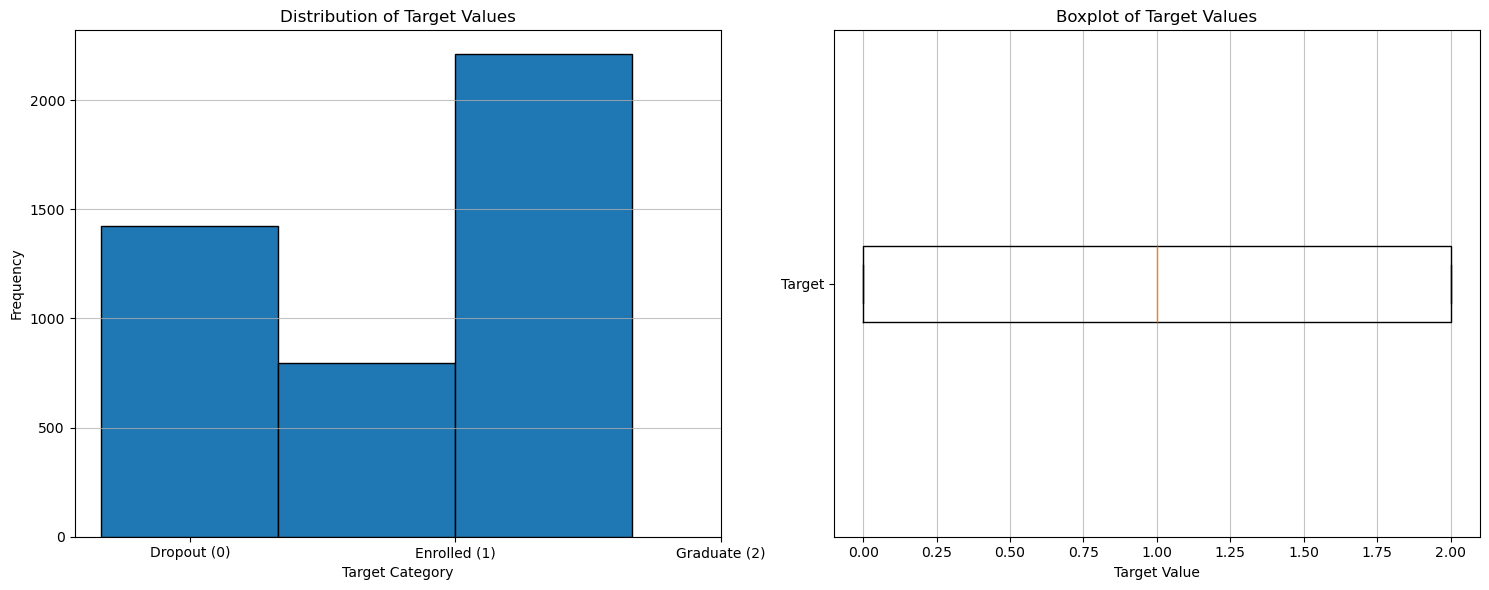

Target Value Statistics:
------------------------------
Total Count: 4424

Value Counts:
Target_numerical
0    1421
1     794
2    2209
Name: count, dtype: int64

Percentage Distribution:
Target_numerical
0    32.120253
1    17.947559
2    49.932188
Name: proportion, dtype: float64


In [8]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Distribution plot (Histogram)
plt.subplot(1, 2, 1)
plt.hist(df['Target_numerical'], bins=3, edgecolor='black', align='left')
plt.xticks([0, 1, 2], ['Dropout (0)', 'Enrolled (1)', 'Graduate (2)'])
plt.title('Distribution of Target Values')
plt.xlabel('Target Category')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['Target_numerical'], vert=False)
plt.yticks([1], ['Target'])
plt.title('Boxplot of Target Values')
plt.xlabel('Target Value')
plt.grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

# Print some statistics
print("Target Value Statistics:")
print("-" * 30)
print(f"Total Count: {len(df['Target_numerical'])}")
print("\nValue Counts:")
print(df['Target_numerical'].value_counts().sort_index())
print("\nPercentage Distribution:")
print((df['Target_numerical'].value_counts(normalize=True) * 100).sort_index())

b. Data cleaning.  
i. Fix or remove outliers  
ii. Filling missing values or drop their rows if it is necessary.  


In [9]:
# Create a copy of the original dataframe
df_cleaned = df.copy()

# First, let's properly identify missing values
# Convert empty strings, spaces, and other placeholders to NaN
df_cleaned = df_cleaned.replace(['', ' ', 'NA', 'N/A', 'na', 'n/a'], np.nan)

# Now let's check for missing values again
print("\nMissing values before cleaning:")
missing_before = df_cleaned.isnull().sum()
print(missing_before)

# Handle missing values in Previous qualification and Admission grade
# For Previous qualification (categorical), fill with mode of nationality group
df_cleaned['Previous qualification'] = df_cleaned.groupby('Nacionality')['Previous qualification'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# For Admission grade (continuous), fill with median of nationality group
df_cleaned['Admission grade'] = df_cleaned.groupby('Nacionality')['Admission grade'].transform(
    lambda x: x.fillna(x.median())
)

# Drop any remaining rows with missing values
df_cleaned = df_cleaned.dropna()

print("\nMissing values after cleaning:")
missing_after = df_cleaned.isnull().sum()
print(missing_after)

print("\nDataset shape before cleaning:", df.shape)
print("Dataset shape after cleaning:", df_cleaned.shape)

# Print the number of rows removed
rows_removed = len(df) - len(df_cleaned)
print(f"\nNumber of rows removed: {rows_removed}")
print(f"Percentage of data removed: {(rows_removed/len(df))*100:.2f}%")

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_data.csv'")


Missing values before cleaning:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder             

feature selection


In [10]:
# First, install scikit-learn
!pip install scikit-learn

# Then run your feature selection code again

Unique values in Target column:
['Dropout' 'Graduate']

Value counts after mapping:
Target_numerical
1    2209
0    1421
Name: count, dtype: int64

Correlation Analysis:

Correlation with Target:
Target_numerical                    1.000000
Curricular units 2nd sem (grade)    0.605350
Curricular units 1st sem (grade)    0.519927
Scholarship holder_1                0.313018
Debtor_0                            0.267207
Course_9500                         0.208112
Displaced_1                         0.126113
Course_9238                         0.115675
Course_9070                         0.054107
Course_9773                         0.031432
Nacionality_26                      0.028636
Course_9085                         0.027400
Nacionality_11                      0.023067
Nacionality_2                       0.018831
Nacionality_24                      0.014569
Nacionality_13                      0.013314
Nacionality_25                      0.013314
Nacionality_62                      0.0

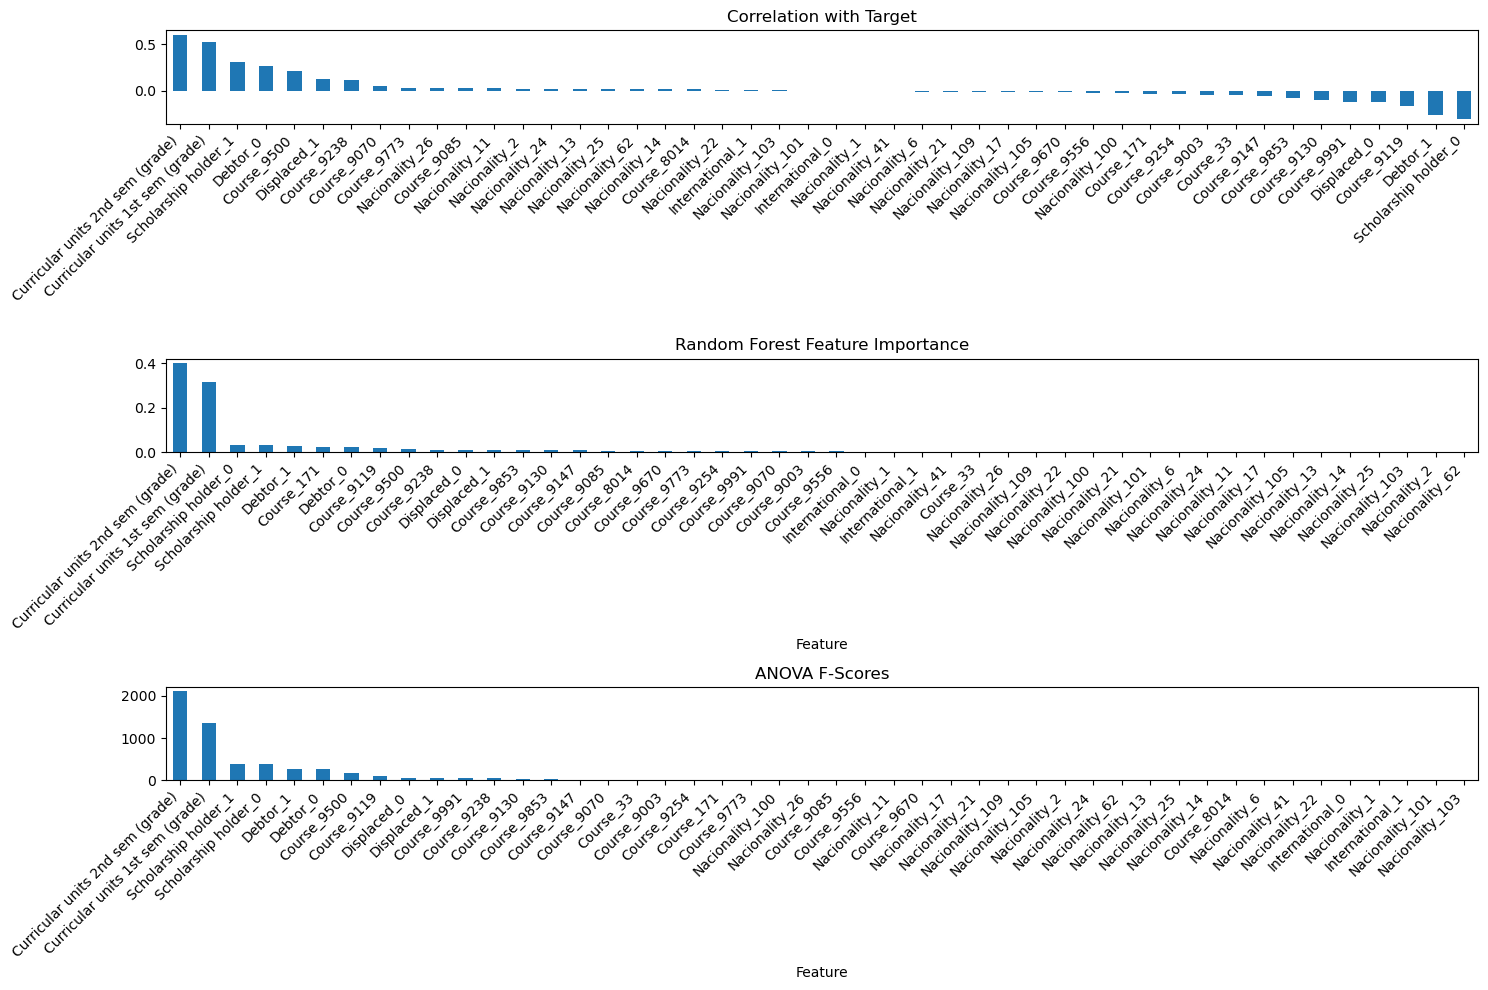


Summary of Most Important Features:
Based on all three methods, the most important features are:

Top 5 features according to Correlation:
Target_numerical                    1.000000
Curricular units 2nd sem (grade)    0.605350
Curricular units 1st sem (grade)    0.519927
Scholarship holder_1                0.313018
Debtor_0                            0.267207
Name: Target_numerical, dtype: float64

Top 5 features according to Random Forest:
Feature
Curricular units 2nd sem (grade)    0.401462
Curricular units 1st sem (grade)    0.314387
Scholarship holder_0                0.033031
Scholarship holder_1                0.030308
Debtor_1                            0.025986
Name: Importance, dtype: float64

Top 5 features according to ANOVA:
Feature
Curricular units 2nd sem (grade)    2098.450927
Curricular units 1st sem (grade)    1344.071040
Scholarship holder_1                 394.084022
Scholarship holder_0                 394.084022
Debtor_1                             278.955393
Na

In [8]:
# First, let's see the unique values in the Target column
print("Unique values in Target column:")
print(df['Target'].unique())

# Map categorical values to numerical values
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# Select the features you specified, excluding mother's and father's qualifications
selected_features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Create a new dataframe with only the selected features and target
df_features = df[selected_features + ['Target_numerical']].copy()

# Convert categorical features to numerical using one-hot encoding
df_features = pd.get_dummies(df_features, columns=[
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor'
])

# Split the data into features and target
X = df_features.drop('Target_numerical', axis=1)
y = df_features['Target_numerical']

# Method 1: Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = df_features.corr()
target_correlations = correlation_matrix['Target_numerical'].sort_values(ascending=False)
print("\nCorrelation with Target:")
print(target_correlations)

# Method 2: Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importances)

# Method 3: ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif

# Apply ANOVA
selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)

# Get ANOVA scores
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values('F-Score', ascending=False)

print("\nANOVA F-Scores:")
print(anova_scores)

# Visualize the results
plt.figure(figsize=(15, 10))

# Plot Correlation
plt.subplot(3, 1, 1)
target_correlations.drop('Target_numerical').plot(kind='bar')
plt.title('Correlation with Target')
plt.xticks(rotation=45, ha='right')

# Plot Random Forest Importance
plt.subplot(3, 1, 2)
feature_importances.set_index('Feature')['Importance'].plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')

# Plot ANOVA Scores
plt.subplot(3, 1, 3)
anova_scores.set_index('Feature')['F-Score'].plot(kind='bar')
plt.title('ANOVA F-Scores')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary of most important features
print("\nSummary of Most Important Features:")
print("Based on all three methods, the most important features are:")
for method, df in [
    ('Correlation', target_correlations),
    ('Random Forest', feature_importances.set_index('Feature')['Importance']),
    ('ANOVA', anova_scores.set_index('Feature')['F-Score'])
]:
    print(f"\nTop 5 features according to {method}:")
    print(df.head(5))


d. Perform feature engineering, such as discretize continuous features,  decompose/aggregate features (*)  


In [12]:
# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')
# Discretize continuous features
# Example: Discretize 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (grade)'
df_cleaned['Curricular units 1st sem (grade)'] = pd.cut(
    df_cleaned['Curricular units 1st sem (grade)'],
    bins=[0, 10, 15, 20],
    labels=['Low', 'Medium', 'High']
)

df_cleaned['Curricular units 2nd sem (grade)'] = pd.cut(
    df_cleaned['Curricular units 2nd sem (grade)'],
    bins=[0, 10, 15, 20],
    labels=['Low', 'Medium', 'High']
)

# Aggregate features
# Example: Create a new feature 'Total Grade' by summing the grades
df_cleaned['Total Grade'] = (
    df_cleaned['Curricular units 1st sem (grade)'].cat.codes +
    df_cleaned['Curricular units 2nd sem (grade)'].cat.codes
)

# Decompose features
# Example: Split 'Course' into multiple binary features using one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['Course'])

# Print the transformed dataframe
print("\nTransformed DataFrame:")
print(df_cleaned.head())

# Save the engineered dataset
df_cleaned.to_csv('engineered_data.csv', index=False)
print("\nEngineered dataset saved as 'engineered_data.csv'")


Transformed DataFrame:
   Marital status  Application mode  Application order  \
0               1                17                  5   
1               1                15                  1   
2               1                 1                  5   
3               1                17                  2   
4               2                39                  1   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1    

Scaling Standardized features


In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

# Check if 'Total Grade' needs to be created
if 'Total Grade' not in df_cleaned.columns:
    # Example: Create 'Total Grade' by summing two grade columns
    df_cleaned['Total Grade'] = (
        df_cleaned['Curricular units 1st sem (grade)'] +
        df_cleaned['Curricular units 2nd sem (grade)']
    )

# Define the features to scale
features_to_scale = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Total Grade'
]

# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df_cleaned[features_to_scale] = min_max_scaler.fit_transform(df_cleaned[features_to_scale])

# Print the scaled features
print("\nMin-Max Scaled Features:")
print(df_cleaned[features_to_scale].head())


Min-Max Scaled Features:
   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                          0.000000                          0.000000   
1                          0.741722                          0.735897   
2                          0.000000                          0.000000   
3                          0.711447                          0.667692   
4                          0.653422                          0.700000   

   Total Grade  
0     0.000000  
1     0.756596  
2     0.000000  
3     0.706330  
4     0.692786  


Decision tree (Naive bayes)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# --- 1. Load Data ---
try:
    df = pd.read_csv('/Users/maiamunich/code/CISC4631/malware-detection/cleaned_data_no_enrolled.csv')
    print("Actual columns in CSV:", df.columns.tolist())
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_data_no_enrolled.csv' not found. Please ensure it's in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred loading the CSV: {e}")
    exit()

# --- 2. Select Features and Target ---
# Use the exact column names from the CSV
feature_cols = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]
target_col = 'Target'

# Map categorical values to numerical values
# Now we only have 'Dropout' and 'Graduate'
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# Check if all specified columns exist in the DataFrame
required_cols = feature_cols + [target_col]
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Error: The following required columns are missing from the CSV: {missing_cols}")
    exit()

# Create a new DataFrame with only the selected columns
df_selected = df[required_cols].copy()

# --- 3. Inspect Data ---
print("\nSelected Data Info:")
df_selected.info()

# Check unique values of the target variable
print(f"\nUnique values in target column ('{target_col}'):")
print(df_selected[target_col].unique())
print(df_selected[target_col].value_counts())

# Identify categorical and numerical features
categorical_features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor'
]

# Check which categorical features actually exist in the feature_cols list
categorical_features_in_data = [col for col in categorical_features if col in feature_cols]

numerical_features = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Check which numerical features actually exist in the feature_cols list
numerical_features_in_data = [col for col in numerical_features if col in feature_cols]

print("\nIdentified Categorical Features:", categorical_features_in_data)
print("Identified Numerical Features:", numerical_features_in_data)

# Check for missing values in selected columns
print("\nMissing values per column:")
print(df_selected.isnull().sum())

# Basic handling: Fill missing numerical with median, categorical with mode
for col in numerical_features_in_data:
    if df_selected[col].isnull().any():
        median_val = df_selected[col].median()
        df_selected[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

for col in categorical_features_in_data:
    if df_selected[col].isnull().any():
        mode_val = df_selected[col].mode()[0]
        df_selected[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

# --- 4. Preprocess Data ---
X = df_selected[feature_cols]
y = df['Target_numerical']  # Use the numerical target

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_in_data),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_in_data)
    ],
    remainder='drop'
)

# --- 5. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")

# --- 6. Create and Train Pipeline ---
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GaussianNB())])

print("\nTraining the Gaussian Naive Bayes model...")
pipeline.fit(X_train, y_train)
print("Training complete.")

# --- 7. Predict ---
print("\nMaking predictions on the test set...")
y_pred = pipeline.predict(X_test)

# --- 8. Evaluate ---
print("\n--- Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
labels = np.unique(np.concatenate((y_test, y_pred)))
print(confusion_matrix(y_test, y_pred, labels=labels))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

Actual columns in CSV: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'

Decison Tree

Actual columns in CSV: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'

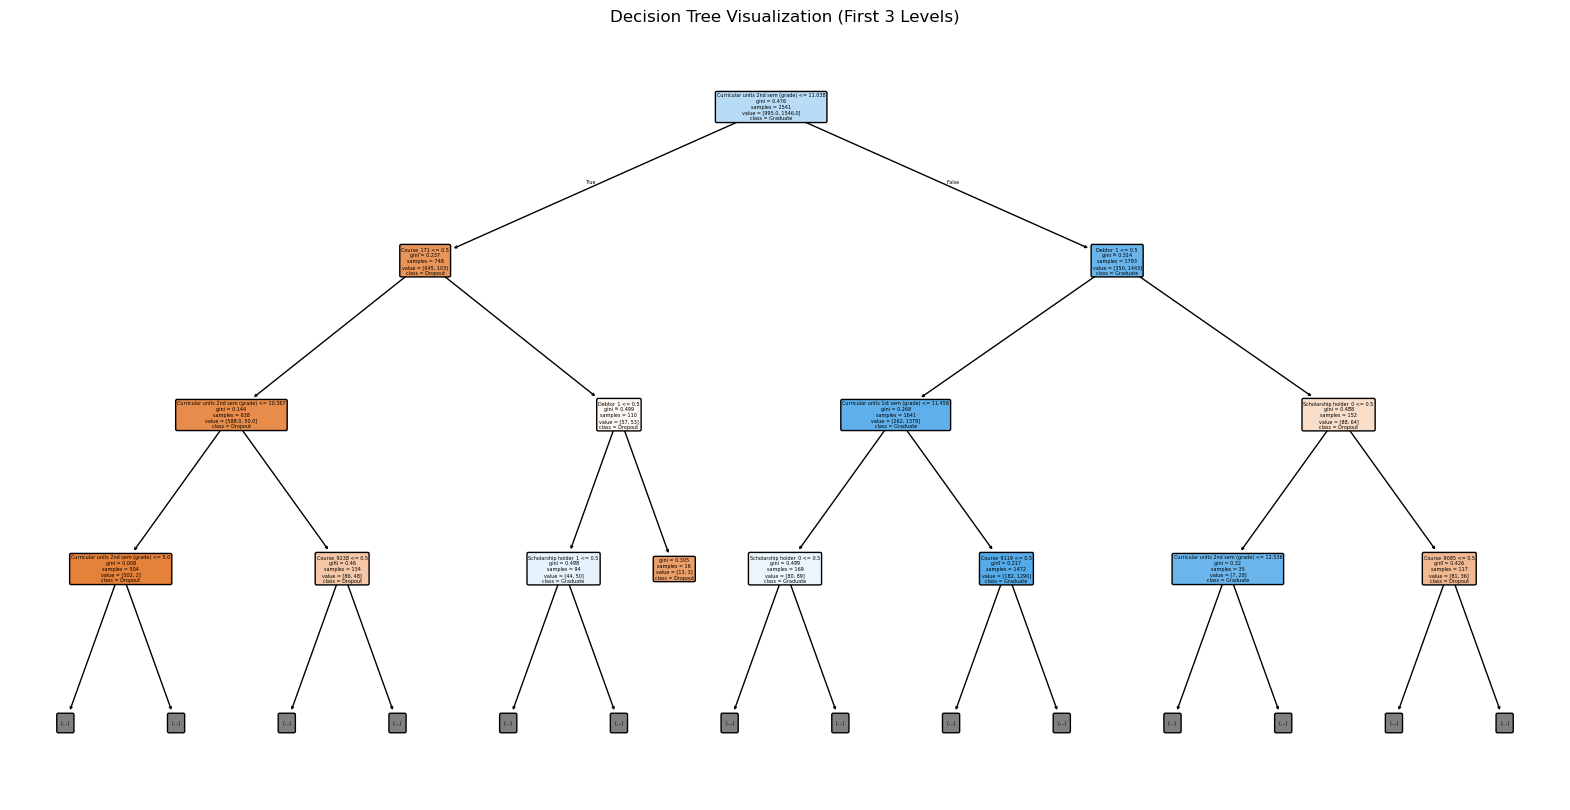

<Figure size 1200x600 with 0 Axes>

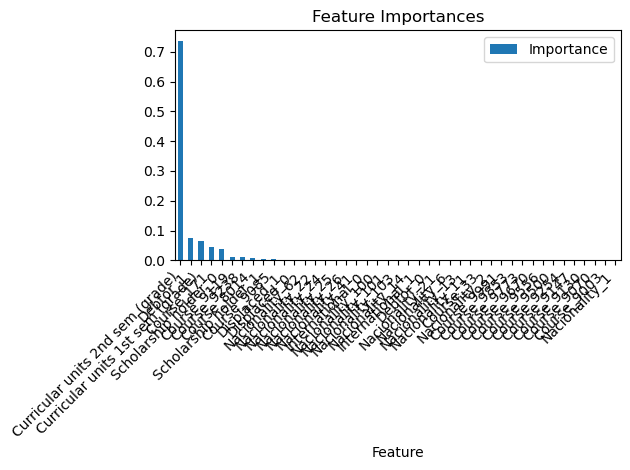

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
try:
    df = pd.read_csv('/Users/maiamunich/code/CISC4631/malware-detection/cleaned_data_no_enrolled.csv')
    print("Actual columns in CSV:", df.columns.tolist())
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_data_no_enrolled.csv' not found. Please ensure it's in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred loading the CSV: {e}")
    exit()

# --- 2. Select Features and Target ---
# Use only the specified columns, excluding mother's and father's qualifications
feature_cols = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]
target_col = 'Target'

# Map categorical values to numerical values
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# Check if all specified columns exist in the DataFrame
required_cols = feature_cols + [target_col]
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Error: The following required columns are missing from the CSV: {missing_cols}")
    exit()

# Create a new DataFrame with only the selected columns
df_selected = df[required_cols].copy()

# --- 3. Inspect Data ---
print("\nSelected Data Info:")
df_selected.info()

# Check unique values of the target variable
print(f"\nUnique values in target column ('{target_col}'):")
print(df_selected[target_col].unique())
print(df_selected[target_col].value_counts())

# Identify categorical and numerical features
categorical_features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor'
]

# Check which categorical features actually exist in the feature_cols list
categorical_features_in_data = [col for col in categorical_features if col in feature_cols]

numerical_features = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Check which numerical features actually exist in the feature_cols list
numerical_features_in_data = [col for col in numerical_features if col in feature_cols]

print("\nIdentified Categorical Features:", categorical_features_in_data)
print("Identified Numerical Features:", numerical_features_in_data)

# Check for missing values in selected columns
print("\nMissing values per column:")
print(df_selected.isnull().sum())

# Basic handling: Fill missing numerical with median, categorical with mode
for col in numerical_features_in_data:
    if df_selected[col].isnull().any():
        median_val = df_selected[col].median()
        df_selected[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

for col in categorical_features_in_data:
    if df_selected[col].isnull().any():
        mode_val = df_selected[col].mode()[0]
        df_selected[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

# --- 4. Preprocess Data ---
X = df_selected[feature_cols]
y = df['Target_numerical']  # Use the numerical target

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_in_data),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_in_data)
    ],
    remainder='drop'
)

# --- 5. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")

# --- 6. Create and Train Decision Tree ---
# Create a pipeline with preprocessing and decision tree
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=5,  # Limit tree depth for better interpretability
        min_samples_split=20,  # Minimum number of samples required to split a node
        min_samples_leaf=10,  # Minimum number of samples required at each leaf node
        random_state=42
    ))
])

print("\nTraining the Decision Tree model...")
dt_pipeline.fit(X_train, y_train)
print("Training complete.")

# --- 7. Predict ---
print("\nMaking predictions on the test set...")
y_pred = dt_pipeline.predict(X_test)

# --- 8. Evaluate ---
print("\n--- Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
labels = np.unique(np.concatenate((y_test, y_pred)))
print(confusion_matrix(y_test, y_pred, labels=labels))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

# --- 9. Feature Importance ---
# Get feature names after one-hot encoding
feature_names = (numerical_features_in_data + 
                list(dt_pipeline.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .get_feature_names_out(categorical_features_in_data)))

# Get feature importances
importances = dt_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# --- 10. Visualize the Decision Tree ---
# Get the decision tree from the pipeline
dt_model = dt_pipeline.named_steps['classifier']

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=feature_names,
          class_names=['Dropout', 'Graduate'],
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for better visualization
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# --- 11. Plot Feature Importances ---
plt.figure(figsize=(12, 6))
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

classification report for decision tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Dropout       0.87      0.72      0.79       414
    Graduate       0.84      0.93      0.89       675

    accuracy                           0.85      1089
   macro avg       0.86      0.83      0.84      1089
weighted avg       0.85      0.85      0.85      1089



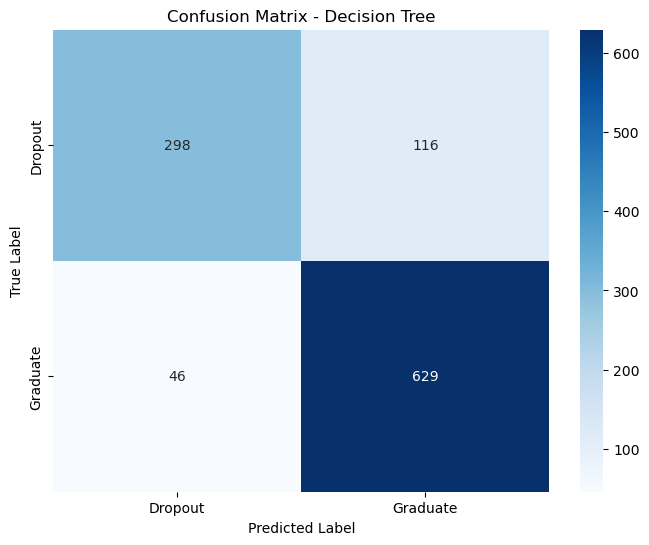


Feature Importance:
                            Feature  Importance
9  Curricular units 2nd sem (grade)    0.818705
7                            Debtor    0.062370
1                            Course    0.052146
8  Curricular units 1st sem (grade)    0.047331
0                Scholarship holder    0.019448
2                       Nacionality    0.000000
3                     International    0.000000
4            Mother's qualification    0.000000
5            Father's qualification    0.000000
6                         Displaced    0.000000


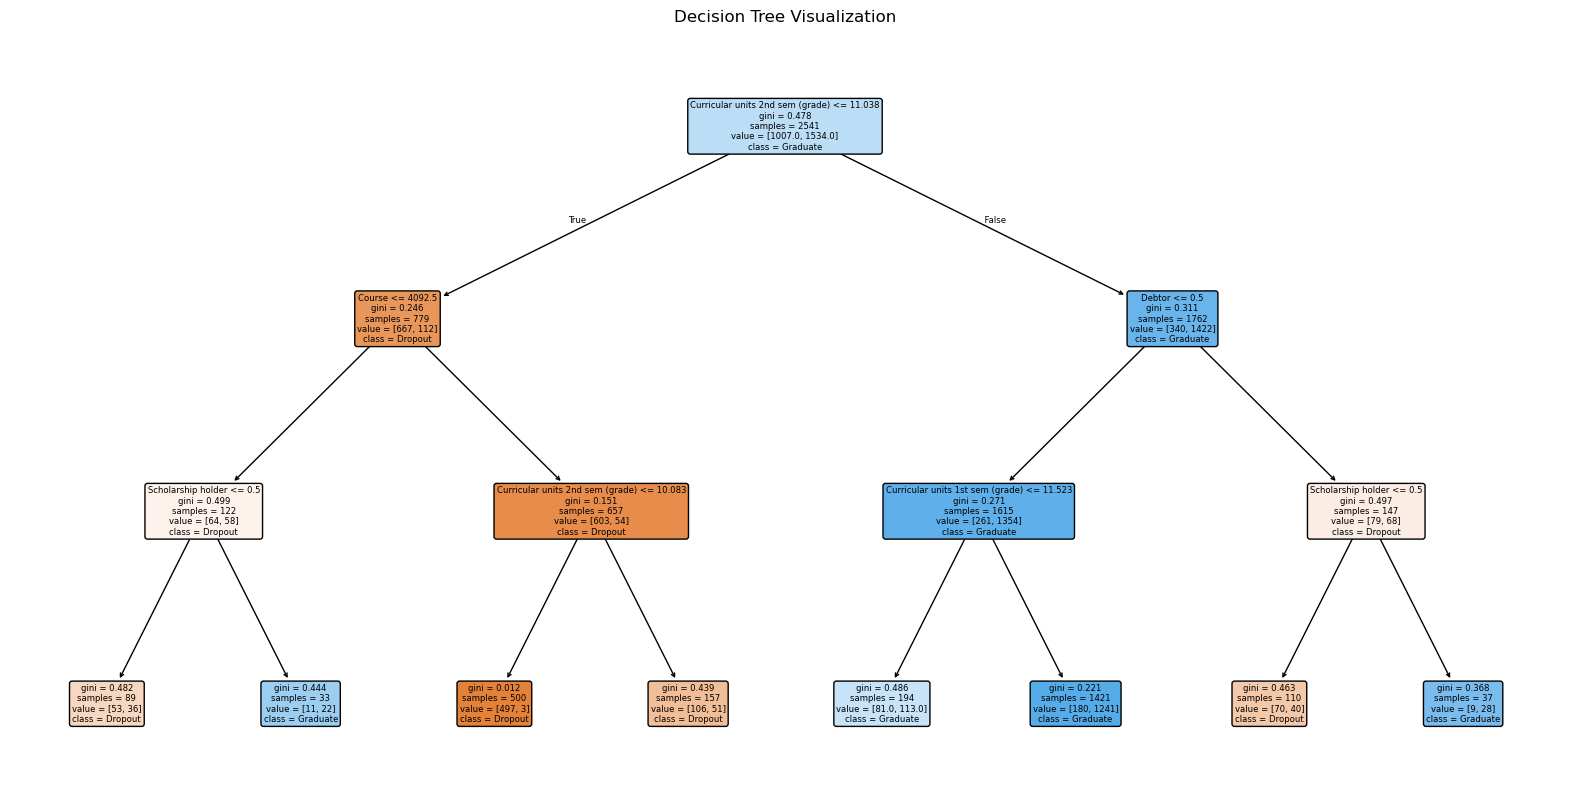

In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data_no_enrolled.csv')

# Filter the data to only include Dropout and Graduate students
df_filtered = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Select features for the model
features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Prepare the data
X = df_filtered[features]
y = df_filtered['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth for interpretability
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print feature importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, 
               feature_names=features,
               class_names=['Dropout', 'Graduate'],
               filled=True,
               rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Let me explain this Decision Tree visualization:

1. **Root Node (Top)**: 
- First decision is based on "Curricular units 2nd sem (grade) <= 11.038"
- This is the most important splitting factor
- Total samples: 2541 students

2. **Second Level Split**:
- Left Branch (True): If second semester grade is <= 11.038
   - Looks at "Course <= 4092.5"
   - These students are more likely to drop out
- Right Branch (False): If second semester grade is > 11.038
   - Looks at "Debtor <= 0.5"
   - These students are more likely to graduate

3. **Third Level Splits**:
Left Side (Lower Grades):
- Further split by "Scholarship holder"
- Shows that scholarship status affects dropout probability for lower-performing students

Right Side (Higher Grades):
- Split by "Curricular units 1st sem (grade)"
- Shows how first semester performance affects graduation likelihood for better-performing students

4. **Color Coding**:
- Blue nodes: Tend toward "Graduate" prediction
- Orange/Brown nodes: Tend toward "Dropout" prediction
- Darker colors indicate stronger predictions

5. **Key Insights**:
- Second semester grades are the strongest predictor
- Course number and debtor status are secondary factors
- Scholarship status becomes important for at-risk students
- Each node shows:
  - gini: measure of node purity (0 = perfect prediction)
  - samples: number of students in that node
  - value: distribution of classes
  - class: predicted outcome

This tree suggests that academic performance in the second semester is the most crucial factor in predicting student outcomes, followed by course selection and financial factors (debtor status and scholarships).


Clustering

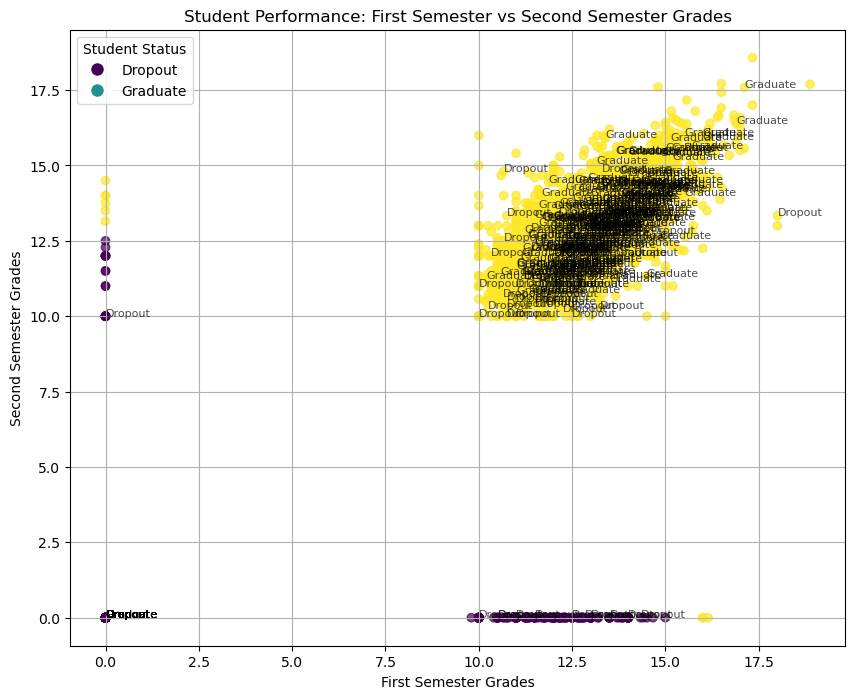


Cluster Statistics:

Cluster 0 (Dropout):
Curricular units 1st sem (grade)    2.567711
Curricular units 2nd sem (grade)    0.268359
dtype: float64

Cluster 1 (Graduate):
Curricular units 1st sem (grade)    12.856131
Curricular units 2nd sem (grade)    12.882055
dtype: float64


In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data_no_enrolled.csv')

# Filter the data to only include Dropout and Graduate students
df_filtered = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Select the two grade columns for visualization
grade_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Perform K-means clustering (2 clusters now)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_filtered[grade_columns])

# Create a mapping of cluster numbers to meaningful labels
cluster_labels = {
    0: 'Dropout',
    1: 'Graduate'
}

# Create the scatter plot with labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_filtered[grade_columns[0]],  # First semester grades
                     df_filtered[grade_columns[1]],  # Second semester grades
                     c=clusters,
                     cmap='viridis',
                     alpha=0.7)

# Add labels to each point (only for a subset to avoid overcrowding)
for i, txt in enumerate(df_filtered['Target']):
    if i % 10 == 0:  # Only label every 10th point
        plt.annotate(txt, (df_filtered[grade_columns[0]].iloc[i], 
                          df_filtered[grade_columns[1]].iloc[i]), 
                    fontsize=8, alpha=0.7)

plt.title('Student Performance: First Semester vs Second Semester Grades')
plt.xlabel('First Semester Grades')
plt.ylabel('Second Semester Grades')

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=plt.cm.viridis(i/2), 
                             label=label, markersize=10)
                  for i, label in cluster_labels.items()]
plt.legend(handles=legend_elements, title='Student Status')

plt.grid(True)
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
for cluster in range(2):  # Now only 2 clusters
    print(f"\nCluster {cluster} ({cluster_labels[cluster]}):")
    cluster_data = df_filtered[clusters == cluster]
    print(cluster_data[grade_columns].mean())

classifiction report for clustering 

Clustering Classification Report:
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00      1421
    Graduate       0.61      1.00      0.76      2209

    accuracy                           0.61      3630
   macro avg       0.30      0.50      0.38      3630
weighted avg       0.37      0.61      0.46      3630



/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


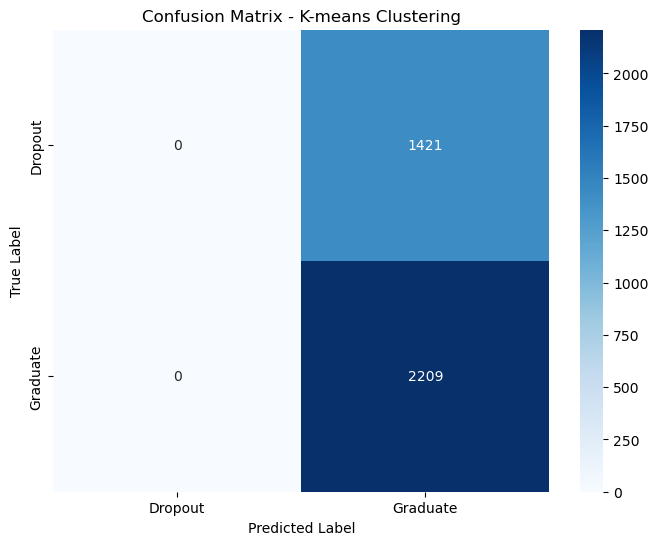


Cluster Statistics:

Cluster 0 (Graduate):
Number of students: 187
Mean values:
Marital status                                      1.021390
Application mode                                   11.395722
Application order                                   1.561497
Course                                            164.358289
Daytime/evening attendance\t                        1.000000
Previous qualification                              3.235294
Previous qualification (grade)                    137.791979
Nacionality                                         3.032086
Mother's qualification                             16.684492
Father's qualification                             19.245989
Mother's occupation                                 7.192513
Father's occupation                                 7.475936
Admission grade                                   135.522995
Displaced                                           0.791444
Educational special needs                           0.021390
Debt

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data_no_enrolled.csv')

# Filter the data to only include Dropout and Graduate students
df_filtered = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Select numeric columns for clustering
numeric_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'Target']

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_filtered[numeric_columns])

# Map clusters to actual labels
# We need to determine which cluster corresponds to which label
cluster_to_label = {}
for cluster in range(2):
    # Get the most common actual label in this cluster
    cluster_data = df_filtered[clusters == cluster]
    most_common_label = cluster_data['Target'].mode()[0]
    cluster_to_label[cluster] = most_common_label

# Convert clusters to predicted labels
predicted_labels = np.array([cluster_to_label[cluster] for cluster in clusters])

# Print classification report
print("Clustering Classification Report:")
print(classification_report(df_filtered['Target'], predicted_labels))

# Create confusion matrix
cm = confusion_matrix(df_filtered['Target'], predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.title('Confusion Matrix - K-means Clustering')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
for cluster in range(2):
    print(f"\nCluster {cluster} ({cluster_to_label[cluster]}):")
    cluster_data = df_filtered[clusters == cluster]
    print(f"Number of students: {len(cluster_data)}")
    print("Mean values:")
    print(cluster_data[numeric_columns].mean())

classification report for naive bayes 

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.63      0.72       414
    Graduate       0.80      0.93      0.86       675

    accuracy                           0.82      1089
   macro avg       0.83      0.78      0.79      1089
weighted avg       0.82      0.82      0.81      1089



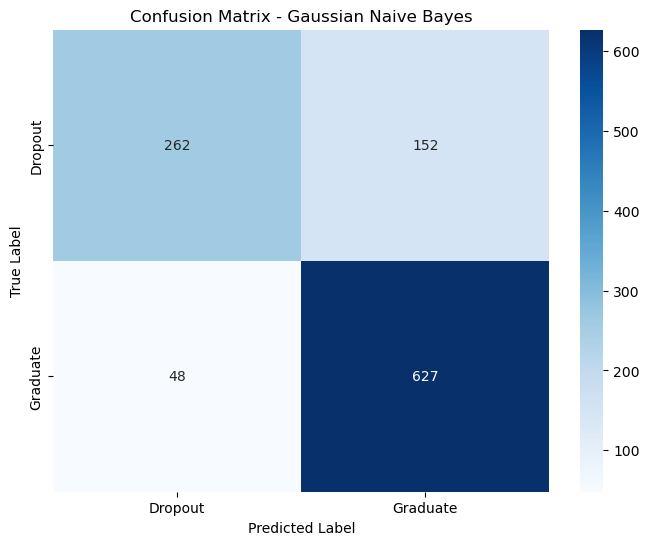


Feature Importance (based on variance):
Scholarship holder: 0.1983
Course: 4571566.5738
Nacionality: 42.7993
International: 0.0216
Mother's qualification: 241.9924
Father's qualification: 232.9731
Displaced: 0.2471
Debtor: 0.1023
Curricular units 1st sem (grade): 25.9858
Curricular units 2nd sem (grade): 30.6727


In [15]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data_no_enrolled.csv')

# Filter the data to only include Dropout and Graduate students
df_filtered = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Select features for the model
features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Prepare the data
X = df_filtered[features]
y = df_filtered['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print feature importance (based on variance)
print("\nFeature Importance (based on variance):")
for feature, importance in zip(features, np.var(X_train, axis=0)):
    print(f"{feature}: {importance:.4f}")

STUDENT PERFORMANCE DATASET OVERVIEW

1. BASIC INFORMATION:
--------------------
Total number of students: 3630
Number of features: 38

2. TARGET DISTRIBUTION:
--------------------
Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64


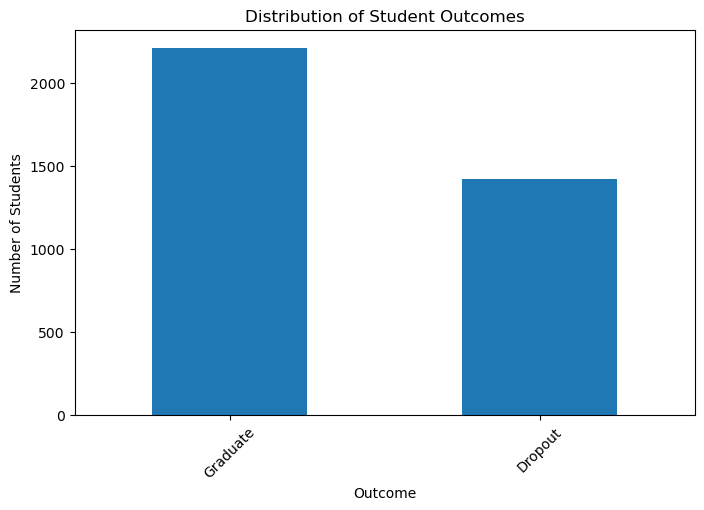


3. FEATURE CATEGORIES:
--------------------

Demographic Features:

Nacionality:
Nacionality
1     3544
41      32
22      12
26       9
6        8
Name: count, dtype: int64

International:
International
0    3544
1      86
Name: count, dtype: int64

Displaced:
Displaced
1    1993
0    1637
Name: count, dtype: int64

Age at enrollment:
Age at enrollment
18    864
19    754
20    459
21    252
22    137
Name: count, dtype: int64

Gender:
Gender
0    2381
1    1249
Name: count, dtype: int64

Academic Background Features:

Mother's qualification:
Mother's qualification
1     865
37    840
19    777
38    471
3     337
Name: count, dtype: int64

Father's qualification:
Father's qualification
37    1010
19     785
1      732
38     575
3      220
Name: count, dtype: int64

Previous qualification:
Previous qualification
1     3019
39     164
19     149
3      122
12      39
Name: count, dtype: int64

Financial Features:

Scholarship holder:
Scholarship holder
0    2661
1     969
Name: count

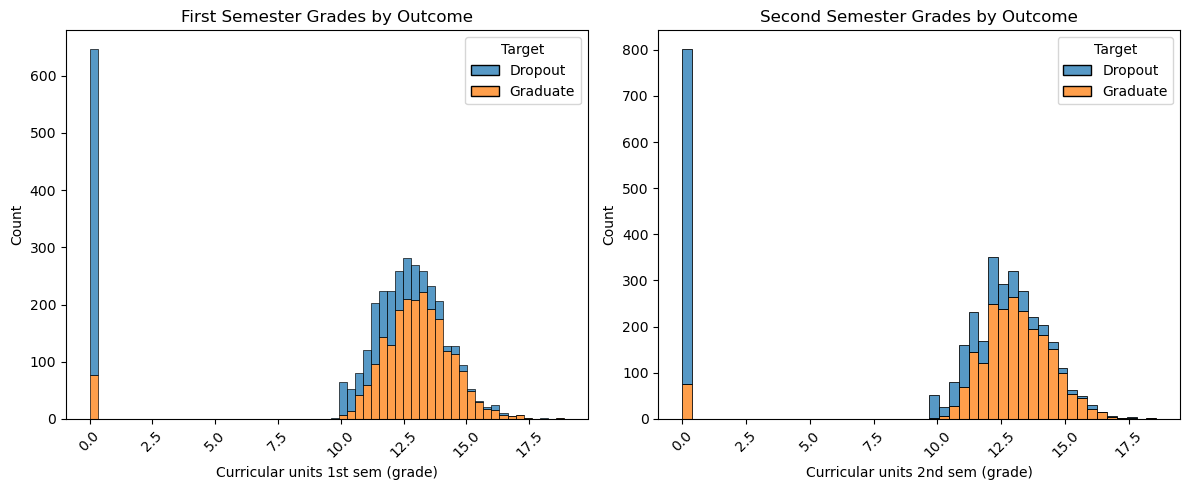


5. CORRELATION WITH DROPOUT:
--------------------

Top correlations with student outcome:
Target_numerical                       1.000000
Curricular units 2nd sem (approved)    0.653995
Curricular units 2nd sem (grade)       0.605350
Curricular units 1st sem (approved)    0.554881
Curricular units 1st sem (grade)       0.519927
Name: Target_numerical, dtype: float64

6. MISSING VALUES:
--------------------
No missing values in the dataset


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('cleaned_data_no_enrolled.csv')

# Create a function to generate a detailed summary
def dataset_overview(df):
    print("=" * 50)
    print("STUDENT PERFORMANCE DATASET OVERVIEW")
    print("=" * 50)
    
    # Basic Information
    print("\n1. BASIC INFORMATION:")
    print("-" * 20)
    print(f"Total number of students: {len(df)}")
    print(f"Number of features: {len(df.columns)}")
    
    # Target Distribution
    print("\n2. TARGET DISTRIBUTION:")
    print("-" * 20)
    target_dist = df['Target'].value_counts()
    print(target_dist)
    
    # Visualize target distribution
    plt.figure(figsize=(8, 5))
    target_dist.plot(kind='bar')
    plt.title('Distribution of Student Outcomes')
    plt.xlabel('Outcome')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45)
    plt.show()
    
    # Feature Categories
    print("\n3. FEATURE CATEGORIES:")
    print("-" * 20)
    
    # Demographic Features
    demographic = ['Nacionality', 'International', 'Displaced', 'Age at enrollment', 'Gender']
    print("\nDemographic Features:")
    for feature in demographic:
        if feature in df.columns:
            print(f"\n{feature}:")
            print(df[feature].value_counts().head())
    
    # Academic Background
    academic = ["Mother's qualification", "Father's qualification", 'Previous qualification']
    print("\nAcademic Background Features:")
    for feature in academic:
        if feature in df.columns:
            print(f"\n{feature}:")
            print(df[feature].value_counts().head())
    
    # Financial Features
    financial = ['Scholarship holder', 'Debtor', 'Tuition fees up to date']
    print("\nFinancial Features:")
    for feature in financial:
        if feature in df.columns:
            print(f"\n{feature}:")
            print(df[feature].value_counts().head())
    
    # Academic Performance
    performance = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
    print("\n4. ACADEMIC PERFORMANCE STATISTICS:")
    print("-" * 20)
    print(df[performance].describe())
    
    # Visualize grade distributions
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Curricular units 1st sem (grade)', hue='Target', multiple="stack")
    plt.title('First Semester Grades by Outcome')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='Curricular units 2nd sem (grade)', hue='Target', multiple="stack")
    plt.title('Second Semester Grades by Outcome')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation Analysis
    print("\n5. CORRELATION WITH DROPOUT:")
    print("-" * 20)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlations = df[numeric_cols].corr()['Target_numerical'].sort_values(ascending=False)
    print("\nTop correlations with student outcome:")
    print(correlations.head())
    
    # Missing Values
    print("\n6. MISSING VALUES:")
    print("-" * 20)
    missing = df.isnull().sum()
    if missing.any():
        print("\nFeatures with missing values:")
        print(missing[missing > 0])
    else:
        print("No missing values in the dataset")

# Run the analysis
dataset_overview(df)

Short list best models?




Analyze the most significant variables for each algorithm

Have another round of feature selection and engineering

Double-click (or enter) to edit

